# **Import Data**

In [2]:
import pandas as pd

df = pd.read_csv('datasets/test.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# **Data Preparation**

**Data Selection**

- Pilih kolom yang akan digunakan kedalam penilaian data
- Buat dataframe baru berdasarkan kolom hasil pemilihan

In [3]:
house_features = ['TotRmsAbvGrd',
                  'LotArea', 
                  'Street',  
                  'OverallCond',
                  'CentralAir',
                  'BsmtCond', 
                  'Functional',
                  'GarageCond',
                  'GarageCars',
                  'PavedDrive',
                  'YearBuilt',
                  'YrSold']

house = df.loc[0:, house_features]

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotRmsAbvGrd  1459 non-null   int64  
 1   LotArea       1459 non-null   int64  
 2   Street        1459 non-null   object 
 3   OverallCond   1459 non-null   int64  
 4   CentralAir    1459 non-null   object 
 5   BsmtCond      1414 non-null   object 
 6   Functional    1457 non-null   object 
 7   GarageCond    1381 non-null   object 
 8   GarageCars    1458 non-null   float64
 9   PavedDrive    1459 non-null   object 
 10  YearBuilt     1459 non-null   int64  
 11  YrSold        1459 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 136.9+ KB


In [5]:
house.describe()

,TotRmsAbvGrd,LotArea,OverallCond,GarageCars,YearBuilt,YrSold
count,1459.000000,1459.000000,1459.000000,1458.000000,1459.000000,1459.000000
mean,6.385195,9819.161069,5.553804,1.766118,1971.357779,2007.769705
std,1.508895,4955.517327,1.113740,0.775945,30.390071,1.301740
min,3.000000,1470.000000,1.000000,0.000000,1879.000000,2006.000000
25%,5.000000,7391.000000,5.000000,1.000000,1953.000000,2007.000000
50%,6.000000,9399.000000,5.000000,2.000000,1973.000000,2008.000000
75%,7.000000,11517.500000,6.000000,2.000000,2001.000000,2009.000000
max,15.000000,56600.000000,9.000000,5.000000,2010.000000,2010.000000


- Pisahkan dataframe menjadi dua kategori, number dan object

In [6]:
house_num = house.select_dtypes('number')
house_cat = house.select_dtypes('object')

**Handle missing values**

In [7]:
import matplotlib.pyplot as plt

- Menampilkan sebaran data yang memiliki missing values

<Axes: >

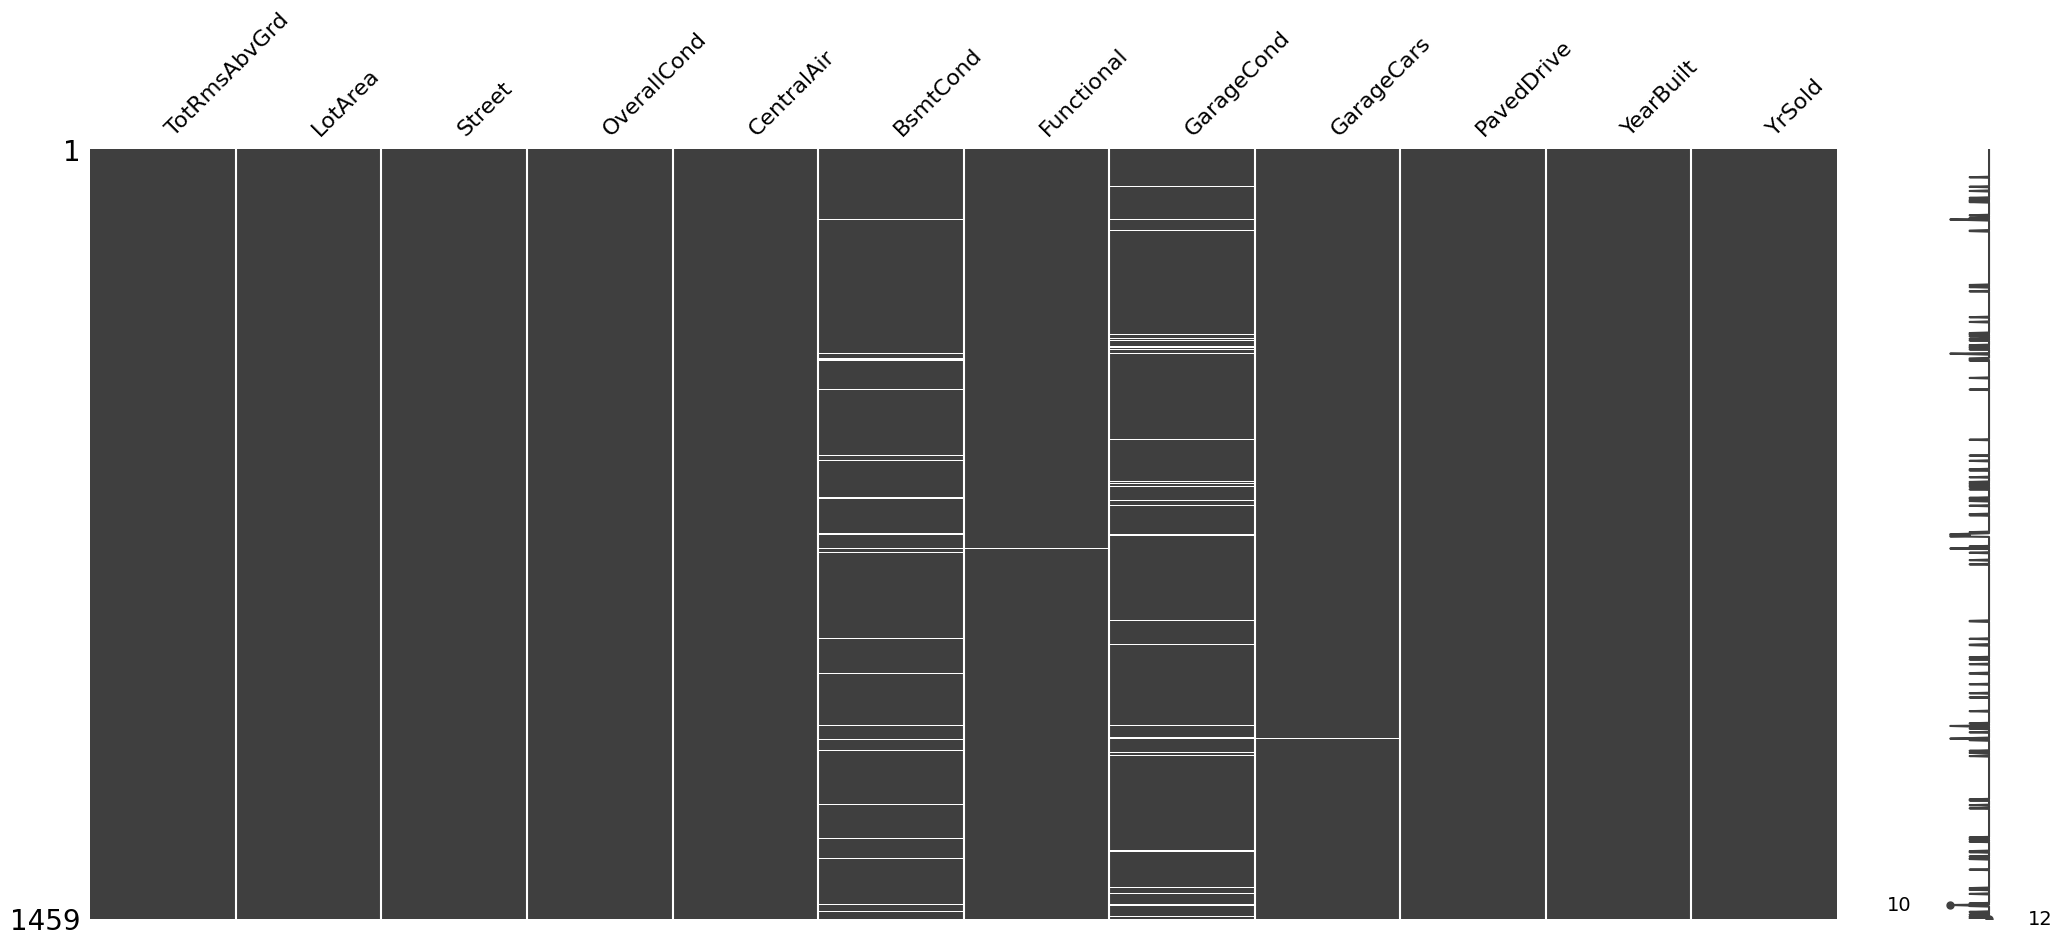

In [8]:
import missingno as mn

mn.matrix(house)

- Persentase data yang hilang 

In [9]:
house.isna().sum()*100/len(house)

TotRmsAbvGrd    0.000000
LotArea         0.000000
Street          0.000000
OverallCond     0.000000
CentralAir      0.000000
BsmtCond        3.084304
Functional      0.137080
GarageCond      5.346127
GarageCars      0.068540
PavedDrive      0.000000
YearBuilt       0.000000
YrSold          0.000000
dtype: float64

- Handle missing values untuk tipe data object

In [10]:
house.select_dtypes('object').describe()

,Street,CentralAir,BsmtCond,Functional,GarageCond,PavedDrive
count,1459,1459,1414,1457,1381,1459
unique,2,2,4,7,5,3
top,Pave,Y,TA,Typ,TA,Y
freq,1453,1358,1295,1357,1328,1301


In [11]:
fn_nan = house[house['Functional'].isna()]  
fn_nan

,TotRmsAbvGrd,LotArea,Street,OverallCond,CentralAir,BsmtCond,Functional,GarageCond,GarageCars,PavedDrive,YearBuilt,YrSold
756,4,14584,Pave,5,N,NaN,NaN,Po,2.0,N,1952,2008
1013,6,10320,Pave,1,Y,Fa,NaN,Fa,1.0,N,1910,2007


In [12]:
house_drop_single_cat_nan = house.drop(index=[756, 1013])
house_drop_single_cat_nan.select_dtypes('object').describe()

,Street,CentralAir,BsmtCond,Functional,GarageCond,PavedDrive
count,1457,1457,1413,1457,1379,1457
unique,2,2,4,7,5,3
top,Pave,Y,TA,Typ,TA,Y
freq,1451,1357,1295,1357,1328,1301


In [13]:
house_drop_cat_nan = house_drop_single_cat_nan.dropna(subset=['BsmtCond', 'GarageCond'])
house_new = house_drop_cat_nan
house_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1342 entries, 0 to 1458
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotRmsAbvGrd  1342 non-null   int64  
 1   LotArea       1342 non-null   int64  
 2   Street        1342 non-null   object 
 3   OverallCond   1342 non-null   int64  
 4   CentralAir    1342 non-null   object 
 5   BsmtCond      1342 non-null   object 
 6   Functional    1342 non-null   object 
 7   GarageCond    1342 non-null   object 
 8   GarageCars    1342 non-null   float64
 9   PavedDrive    1342 non-null   object 
 10  YearBuilt     1342 non-null   int64  
 11  YrSold        1342 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 136.3+ KB


In [14]:
house_new_num = house_new.select_dtypes('number')
house_new_cat = house_new.select_dtypes('object')

In [15]:
house_new_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1342 entries, 0 to 1458
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotRmsAbvGrd  1342 non-null   int64  
 1   LotArea       1342 non-null   int64  
 2   OverallCond   1342 non-null   int64  
 3   GarageCars    1342 non-null   float64
 4   YearBuilt     1342 non-null   int64  
 5   YrSold        1342 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 73.4 KB


**Cek Imbalance Data**

In [16]:
import seaborn as sns

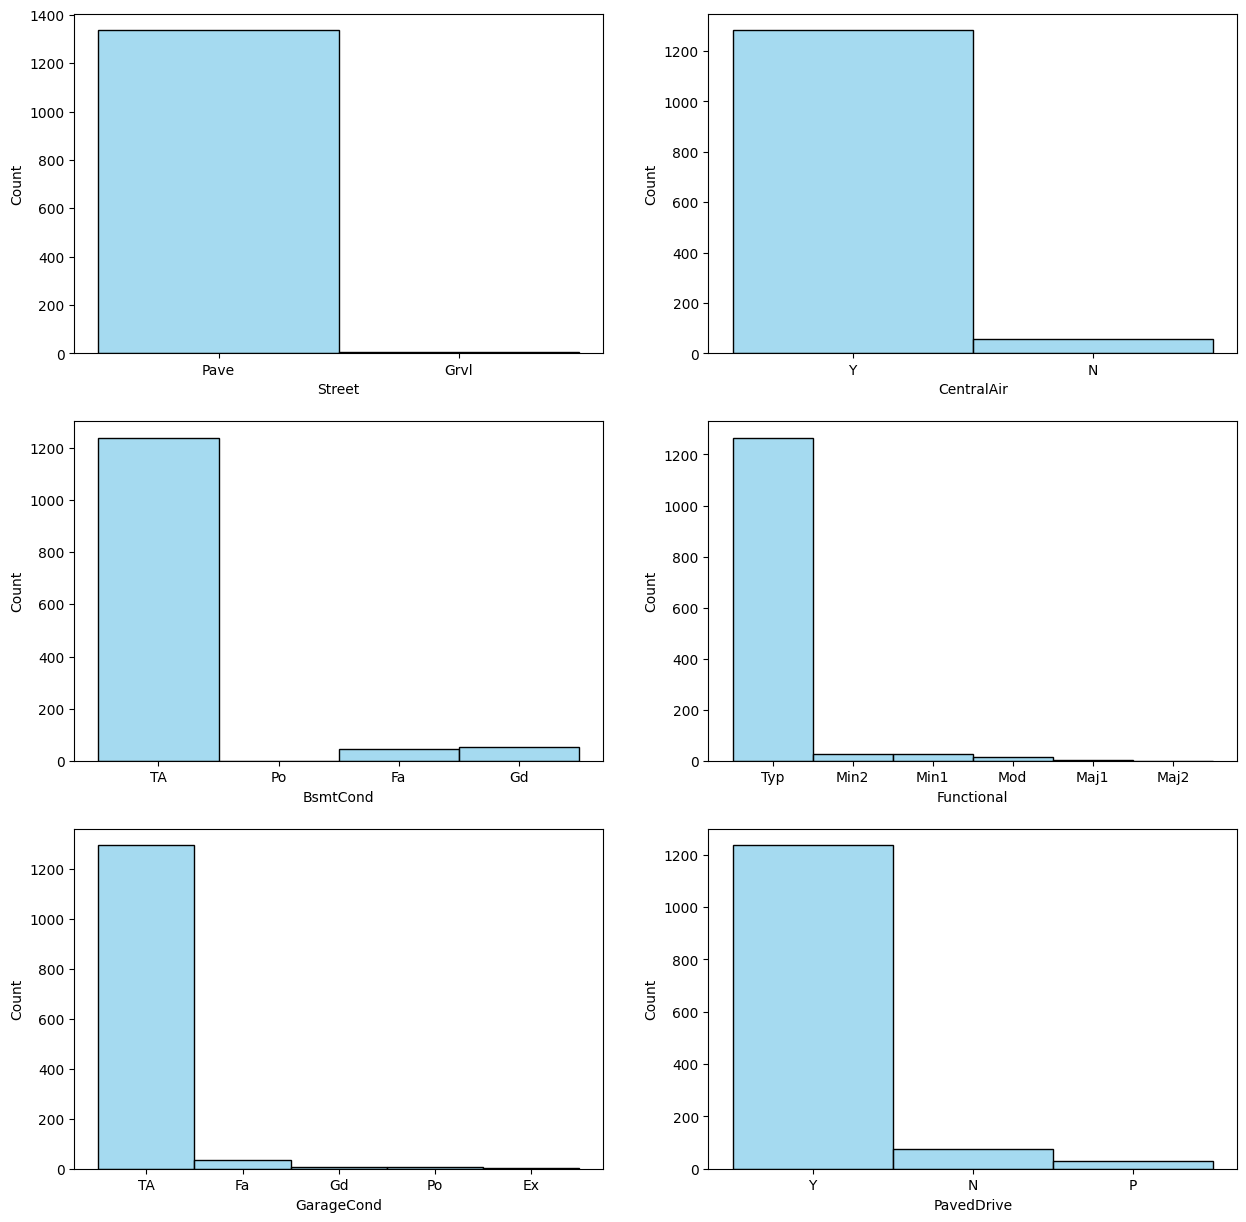

In [17]:
fig,axes = plt.subplots(3, 2, figsize=(15,15))

sns.histplot(data=house_new_cat, x='Street', ax=axes[0,0], color='skyblue')
sns.histplot(data=house_new_cat, x='CentralAir', ax=axes[0,1], color='skyblue')
sns.histplot(data=house_new_cat, x='BsmtCond', ax=axes[1,0], color='skyblue')
sns.histplot(data=house_new_cat, x='Functional', ax=axes[1,1], color='skyblue')
sns.histplot(data=house_new_cat, x='GarageCond', ax=axes[2,0], color='skyblue')
sns.histplot(data=house_new_cat, x='PavedDrive', ax=axes[2,1], color='skyblue')
plt.show()

**Handling Imbalance Data**

- Cek kondisi data kategorikal

In [18]:
house_new_cat.describe()

,Street,CentralAir,BsmtCond,Functional,GarageCond,PavedDrive
count,1342,1342,1342,1342,1342,1342
unique,2,2,4,6,5,3
top,Pave,Y,TA,Typ,TA,Y
freq,1338,1284,1239,1266,1295,1237


- Encode data untuk persiapan SMOTE

In [19]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

In [20]:
house_new_transform = house_new.copy()

bsmtcond_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
functional_mapping = {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0}
garagecond_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}

house_new_transform['BsmtCond'] = house_new_transform['BsmtCond'].map(bsmtcond_mapping)
house_new_transform['Functional'] = house_new_transform['Functional'].map(functional_mapping)
house_new_transform['GarageCond'] = house_new_transform['GarageCond'].map(garagecond_mapping)

house_new_transform['Street'] = en.fit_transform(house_new['Street'].values)
house_new_transform['CentralAir'] = en.fit_transform(house_new['CentralAir'].values)
house_new_transform['PavedDrive'] = en.fit_transform(house_new['PavedDrive'].values)

In [21]:
house_new_transform.head()

,TotRmsAbvGrd,LotArea,Street,OverallCond,CentralAir,BsmtCond,Functional,GarageCond,GarageCars,PavedDrive,YearBuilt,YrSold
0,5,11622,1,6,1,3,7,3,1.0,2,1961,2010
1,6,14267,1,6,1,3,7,3,1.0,2,1958,2010
2,6,13830,1,5,1,3,7,3,2.0,2,1997,2010
3,7,9978,1,6,1,3,7,3,2.0,2,1998,2010
4,5,5005,1,5,1,3,7,3,2.0,2,1992,2010


- Handle imbalance data dengan metode SMOTE

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
x = house_new_transform.drop(['PavedDrive'], axis=1)
y = house_new_transform['PavedDrive']

sm = SMOTE(random_state=42)
x_sampling, y_sampling = sm.fit_resample(x, y)

x_sampling_df = pd.DataFrame(x_sampling, columns=x.columns)
y_sampling_df = pd.DataFrame(y_sampling, columns=['PavedDrive'])

sampling_pd = pd.concat([x_sampling_df, y_sampling_df], axis=1)

In [24]:
x = sampling_pd.drop(['CentralAir'], axis=1)
y = sampling_pd['CentralAir']

sm = SMOTE(random_state=42)
x_sampling, y_sampling = sm.fit_resample(x, y)

x_sampling_df = pd.DataFrame(x_sampling, columns=x.columns)
y_sampling_df = pd.DataFrame(y_sampling, columns=['CentralAir'])

sampling_ca = pd.concat([x_sampling_df, y_sampling_df], axis=1)

In [25]:
x = sampling_ca.drop(['Street'], axis=1)
y = sampling_ca['Street']

sm = SMOTE(random_state=42)
x_sampling, y_sampling = sm.fit_resample(x, y)

x_sampling_df = pd.DataFrame(x_sampling, columns=x.columns)
y_sampling_df = pd.DataFrame(y_sampling, columns=['Street'])

sampling_st = pd.concat([x_sampling_df, y_sampling_df], axis=1)

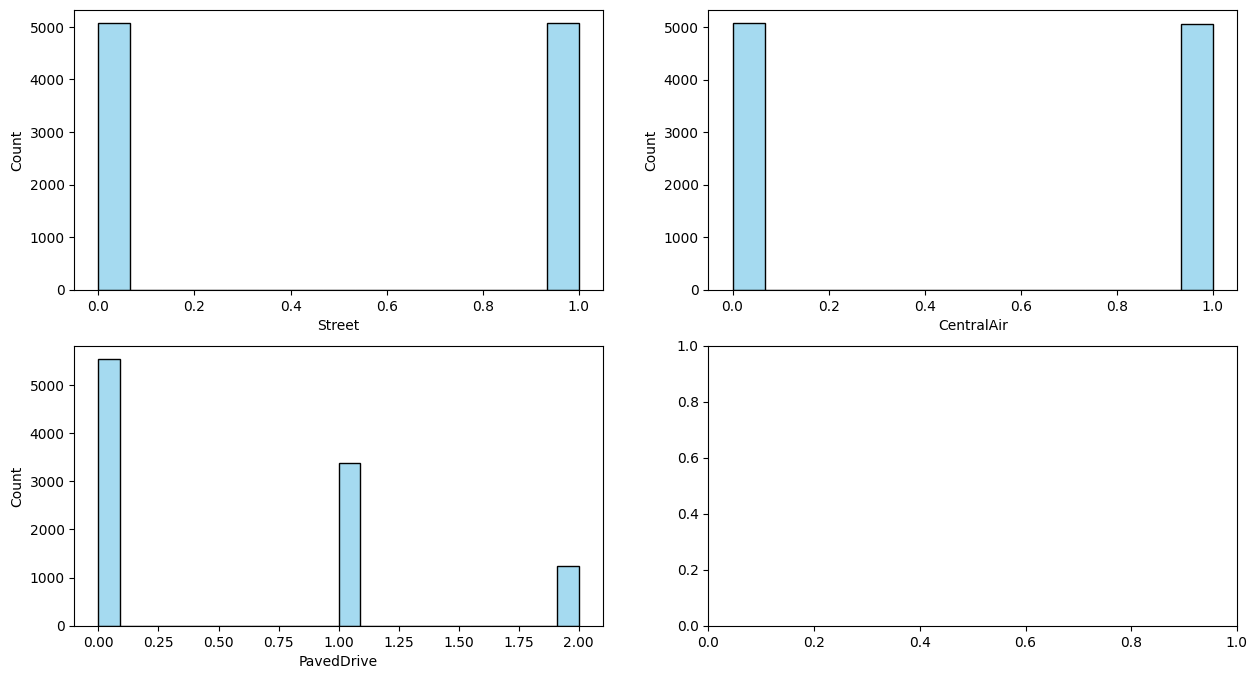

In [26]:
fig,axes = plt.subplots(2, 2, figsize=(15,8))

sns.histplot(data=sampling_st, x='Street', ax=axes[0,0], color='skyblue')
sns.histplot(data=sampling_st, x='CentralAir', ax=axes[0,1], color='skyblue')
sns.histplot(data=sampling_st, x='PavedDrive', ax=axes[1,0], color='skyblue')
plt.show()

In [27]:
x = sampling_st.drop(['PavedDrive'], axis=1)
y = sampling_st['PavedDrive']

sm = SMOTE(random_state=42)
x_sampling, y_sampling = sm.fit_resample(x, y)

x_sampling_df = pd.DataFrame(x_sampling, columns=x.columns)
y_sampling_df = pd.DataFrame(y_sampling, columns=['PavedDrive'])

sampling_tes = pd.concat([x_sampling_df, y_sampling_df], axis=1)

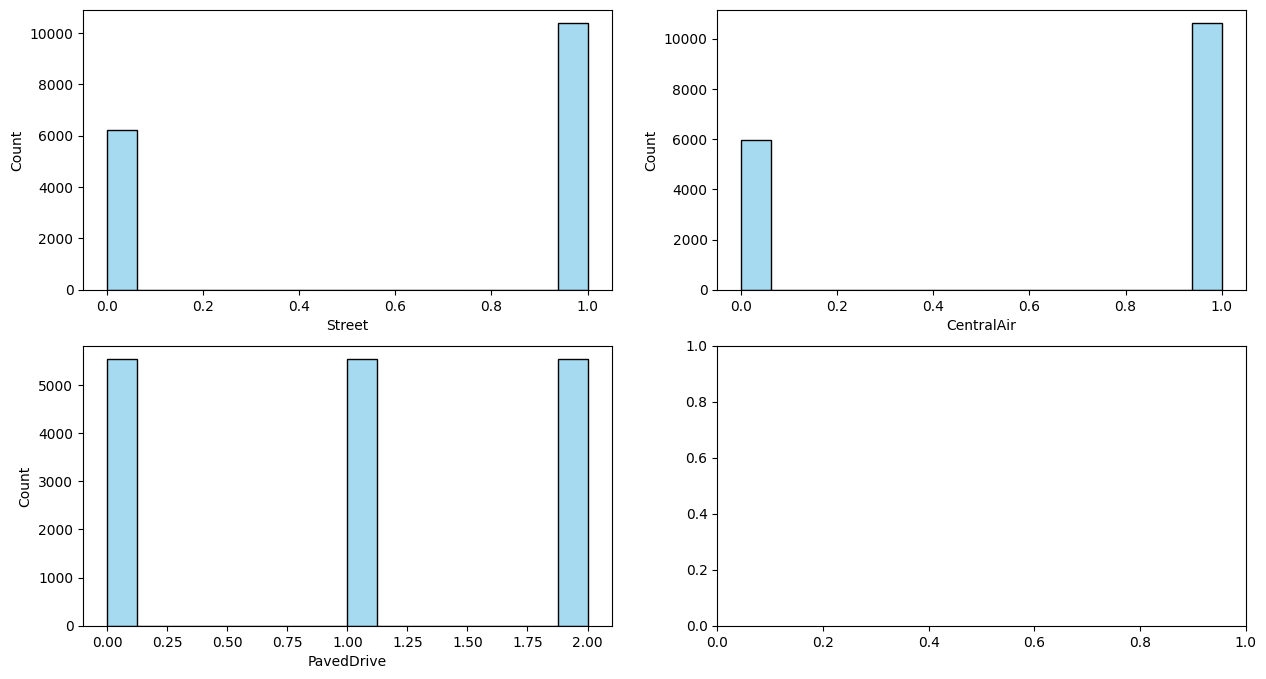

In [28]:
fig,axes = plt.subplots(2, 2, figsize=(15,8))

sns.histplot(data=sampling_tes, x='Street', ax=axes[0,0], color='skyblue')
sns.histplot(data=sampling_tes, x='CentralAir', ax=axes[0,1], color='skyblue')
sns.histplot(data=sampling_tes, x='PavedDrive', ax=axes[1,0], color='skyblue')
plt.show()

- Gunakan RandomOverSampler untuk Functional, GarageCond, BsmtCond

In [29]:
from imblearn.over_sampling import RandomOverSampler

x = sampling_tes.drop(['Functional'], axis=1)
y = sampling_tes['Functional']

sm = RandomOverSampler(random_state=42)
x_sampling, y_sampling = sm.fit_resample(x, y)

x_sampling_df = pd.DataFrame(x_sampling, columns=x.columns)
y_sampling_df = pd.DataFrame(y_sampling, columns=['Functional'])

sampling_z = pd.concat([x_sampling_df, y_sampling_df], axis=1)

In [30]:
x = sampling_z.drop(['BsmtCond'], axis=1)
y = sampling_z['BsmtCond']

sm = RandomOverSampler(random_state=42)
x_sampling, y_sampling = sm.fit_resample(x, y)

x_sampling_df = pd.DataFrame(x_sampling, columns=x.columns)
y_sampling_df = pd.DataFrame(y_sampling, columns=['BsmtCond'])

sampling_y = pd.concat([x_sampling_df, y_sampling_df], axis=1)

In [31]:
x = sampling_y.drop(['GarageCond'], axis=1)
y = sampling_y['GarageCond']

sm = RandomOverSampler(random_state=42)
x_sampling, y_sampling = sm.fit_resample(x, y)

x_sampling_df = pd.DataFrame(x_sampling, columns=x.columns)
y_sampling_df = pd.DataFrame(y_sampling, columns=['GarageCond'])

sampling_x = pd.concat([x_sampling_df, y_sampling_df], axis=1)

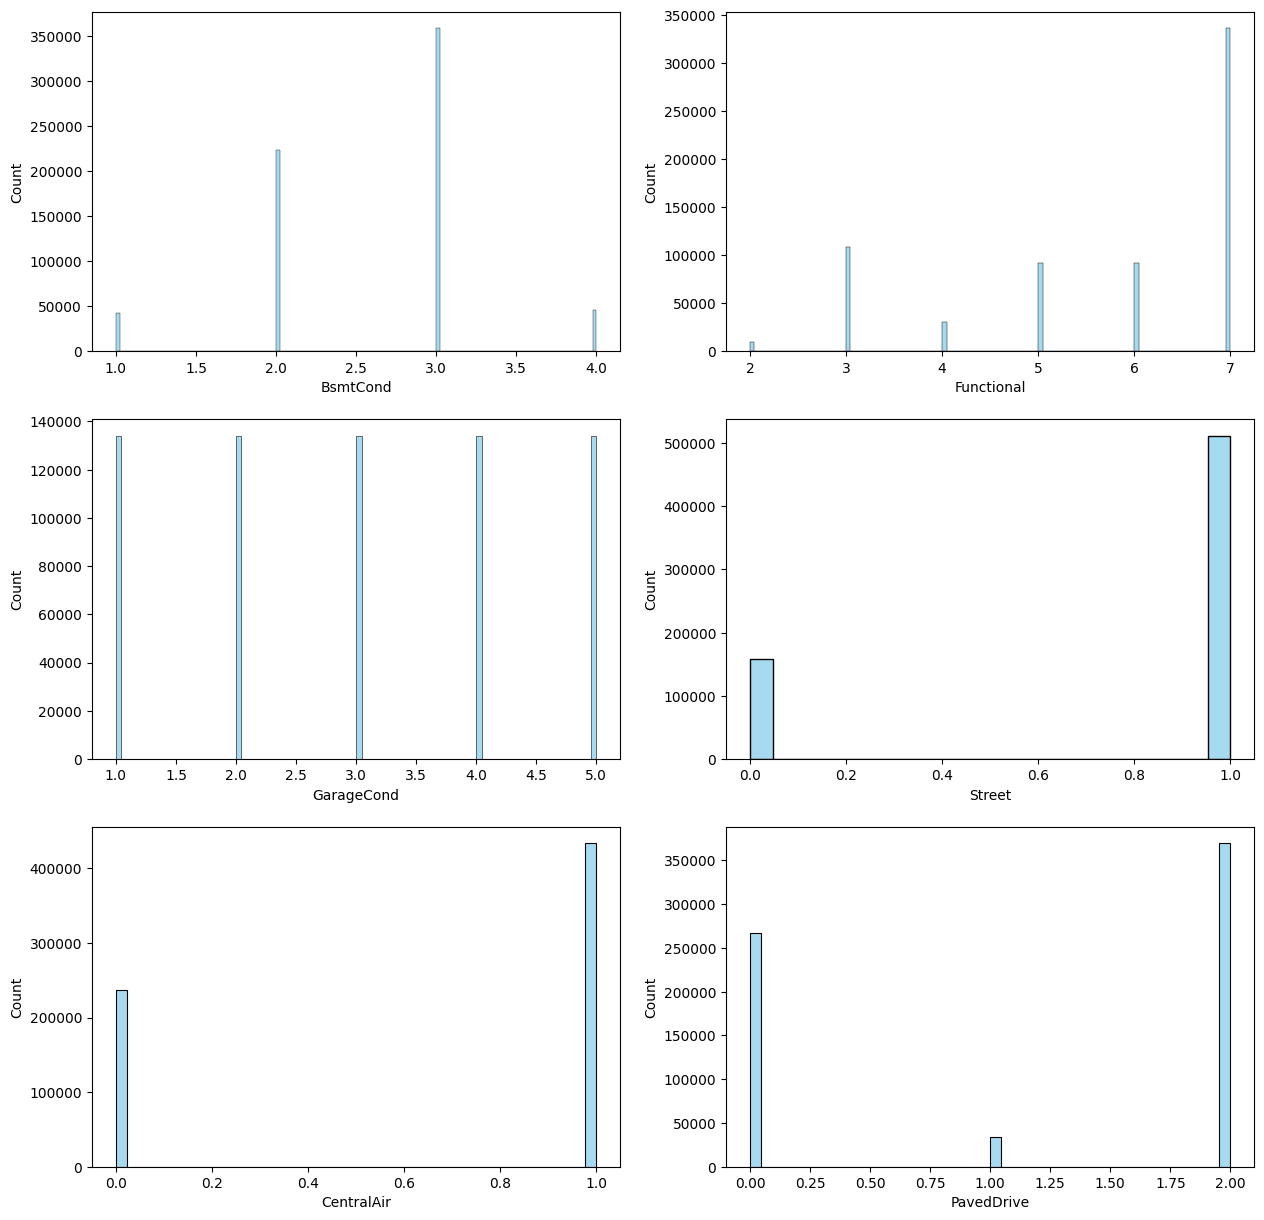

In [32]:
fig,axes = plt.subplots(3, 2, figsize=(15,15))

sns.histplot(data=sampling_x, x='BsmtCond', ax=axes[0,0], color='skyblue')
sns.histplot(data=sampling_x, x='Functional', ax=axes[0,1], color='skyblue')
sns.histplot(data=sampling_x, x='GarageCond', ax=axes[1,0], color='skyblue')
sns.histplot(data=sampling_x, x='Street', ax=axes[1,1], color='skyblue')
sns.histplot(data=sampling_x, x='CentralAir', ax=axes[2,0], color='skyblue')
sns.histplot(data=sampling_x, x='PavedDrive', ax=axes[2,1], color='skyblue')

plt.show()

- Transform ulang data ke bentuk semula

In [33]:
house_new_transform = sampling_tes.copy()

bsmtcond_inverse_mapping = {5: 'Ex', 4: 'Gd', 3: 'TA', 2: 'Fa', 1: 'Po', 0: 'NA'}
functional_inverse_mapping = {7: 'Typ', 6: 'Min1', 5: 'Min2', 4: 'Mod', 3: 'Maj1', 2: 'Maj2', 1: 'Sev', 0: 'Sal'}
garagecond_inverse_mapping = {5: 'Ex', 4: 'Gd', 3: 'TA', 2: 'Fa', 1: 'Po', 0: 'NA'}

house_new_transform['BsmtCond'] = house_new_transform['BsmtCond'].map(bsmtcond_inverse_mapping)
house_new_transform['Functional'] = house_new_transform['Functional'].map(functional_inverse_mapping)
house_new_transform['GarageCond'] = house_new_transform['GarageCond'].map(garagecond_inverse_mapping)

house_new_transform['CentralAir'] = en.inverse_transform(house_new_transform['CentralAir'])
house_new_transform['Street'] = en.inverse_transform(house_new_transform['Street'])
house_new_transform['PavedDrive'] = en.inverse_transform(house_new_transform['PavedDrive'])

In [34]:
house_new_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotRmsAbvGrd  16599 non-null  int64  
 1   LotArea       16599 non-null  int64  
 2   OverallCond   16599 non-null  int64  
 3   BsmtCond      16599 non-null  object 
 4   Functional    16599 non-null  object 
 5   GarageCond    16599 non-null  object 
 6   GarageCars    16599 non-null  float64
 7   YearBuilt     16599 non-null  int64  
 8   YrSold        16599 non-null  int64  
 9   CentralAir    16599 non-null  object 
 10  Street        16599 non-null  object 
 11  PavedDrive    16599 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.5+ MB


In [35]:
house_new_transform['GarageCars'] = house_new_transform['GarageCars'].round().astype(int)

In [36]:
house_new_transform['GarageCars'].value_counts()

GarageCars
2    9456
1    5715
3    1273
4     133
5      22
Name: count, dtype: int64

**Handle Outliers**

- Cek outliers

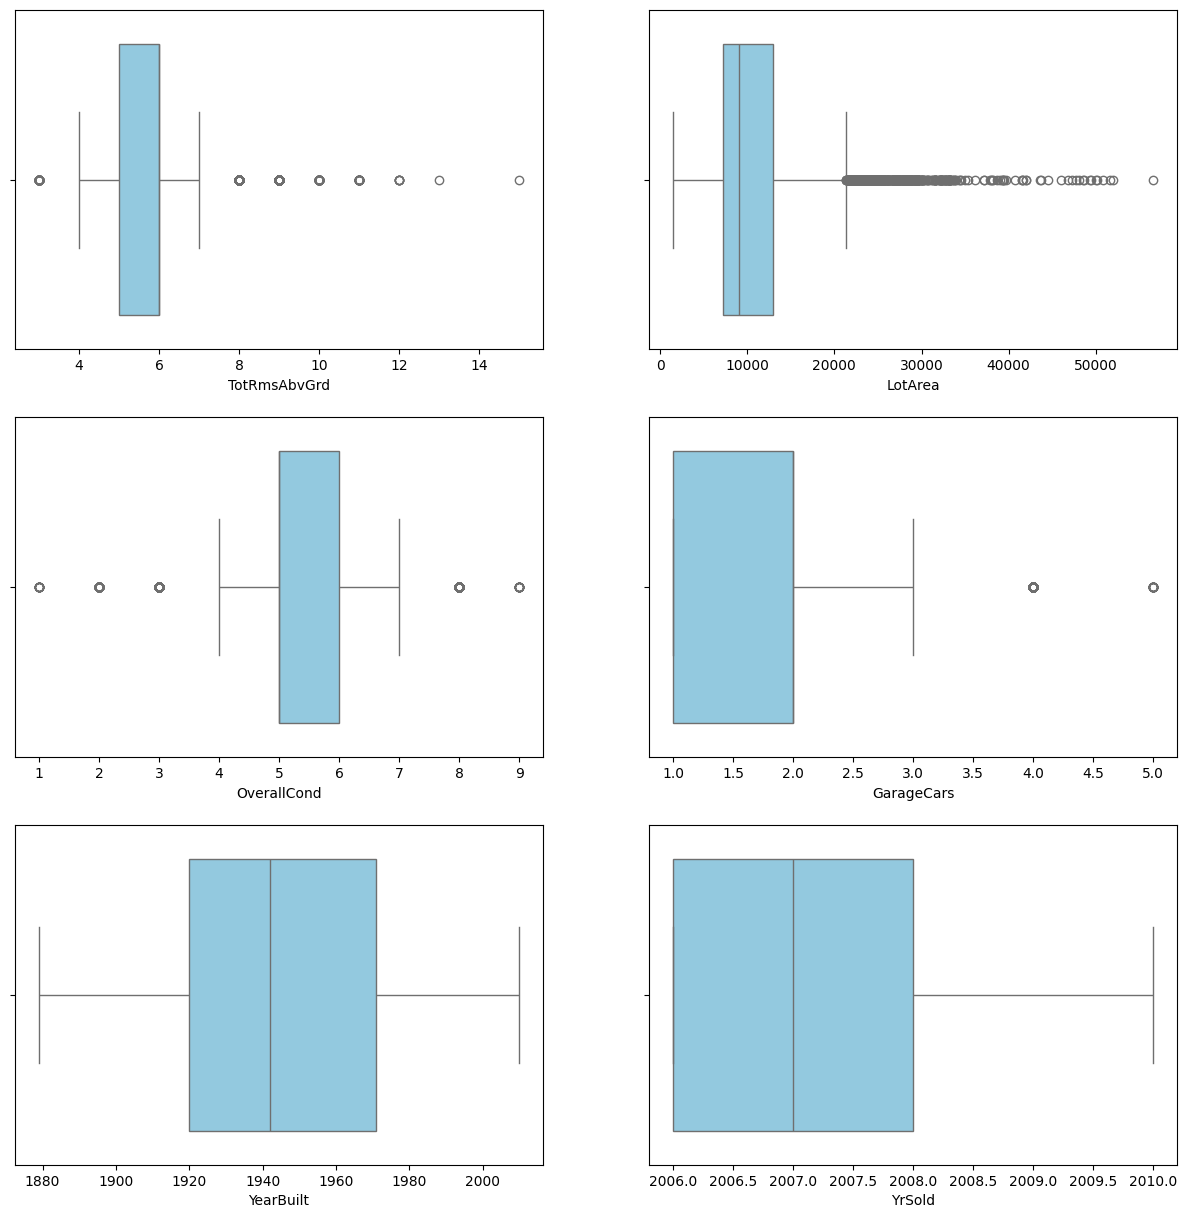

In [37]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.boxplot(data=house_new_transform, x='TotRmsAbvGrd', ax=axes[0,0], color='skyblue')
sns.boxplot(data=house_new_transform, x='LotArea', ax=axes[0,1], color='skyblue')
sns.boxplot(data=house_new_transform, x='OverallCond', ax=axes[1,0], color='skyblue')
sns.boxplot(data=house_new_transform, x='GarageCars', ax=axes[1,1], color='skyblue')
sns.boxplot(data=house_new_transform, x='YearBuilt', ax=axes[2,0], color='skyblue')
sns.boxplot(data=house_new_transform, x='YrSold', ax=axes[2,1], color='skyblue')

plt.show()

- Lakukan handling outliers untuk LotArea

In [38]:
Q1 = house_new_transform['LotArea'].quantile(0.25)
Q3 = house_new_transform['LotArea'].quantile(0.75)
IQR = Q3 - Q1

lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

outliers_low = (house_new_transform['LotArea'] < lower_lim)
outliers_up = (house_new_transform['LotArea'] > upper_lim)
house_x = house_new_transform['LotArea'][~(outliers_low | outliers_up)]

house_1 = house_new_transform.copy()
house_1['LotArea'] = house_x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotRmsAbvGrd  16599 non-null  int64  
 1   LotArea       15465 non-null  float64
 2   OverallCond   16599 non-null  int64  
 3   BsmtCond      16599 non-null  object 
 4   Functional    16599 non-null  object 
 5   GarageCond    16599 non-null  object 
 6   GarageCars    16599 non-null  int32  
 7   YearBuilt     16599 non-null  int64  
 8   YrSold        16599 non-null  int64  
 9   CentralAir    16599 non-null  object 
 10  Street        16599 non-null  object 
 11  PavedDrive    16599 non-null  object 
dtypes: float64(1), int32(1), int64(4), object(6)
memory usage: 1.5+ MB


<Axes: xlabel='LotArea'>

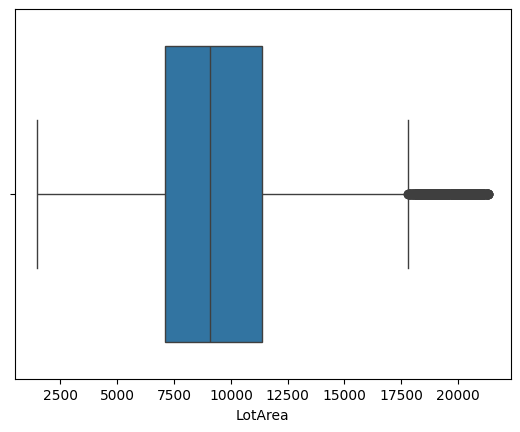

In [39]:
house_1.info()
sns.boxplot(data=house_1, x='LotArea')

<class 'pandas.core.frame.DataFrame'>
Index: 4331 entries, 7 to 16597
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotRmsAbvGrd  4331 non-null   int64  
 1   LotArea       4331 non-null   float64
 2   OverallCond   4331 non-null   int64  
 3   BsmtCond      4331 non-null   object 
 4   Functional    4331 non-null   object 
 5   GarageCond    4331 non-null   object 
 6   GarageCars    4331 non-null   int32  
 7   YearBuilt     4331 non-null   int64  
 8   YrSold        4331 non-null   int64  
 9   CentralAir    4331 non-null   object 
 10  Street        4331 non-null   object 
 11  PavedDrive    4331 non-null   object 
dtypes: float64(1), int32(1), int64(4), object(6)
memory usage: 422.9+ KB


<Axes: xlabel='LotArea'>

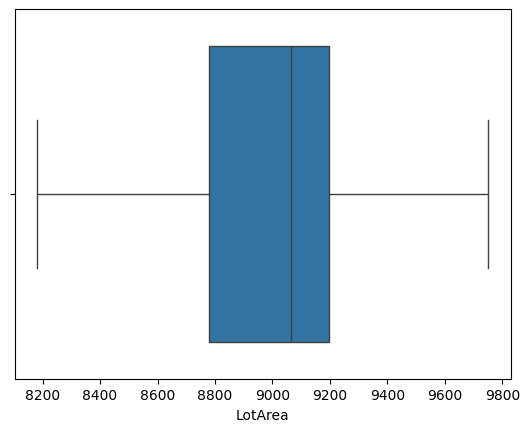

In [40]:
trim_percentile = 0.36  # 36% pada setiap sisi

upper_threshold = house_1['LotArea'].quantile(1 - trim_percentile)
lower_threshold = house_1['LotArea'].quantile(trim_percentile)

trimmed_df = house_1[(house_1['LotArea'] >= lower_threshold) & (house_1['LotArea'] <= upper_threshold)]

trimmed_df.info()
sns.boxplot(data=trimmed_df, x='LotArea')


- Lakukan handling outliers untuk GarageCars

In [41]:
Q1 = trimmed_df['GarageCars'].quantile(0.25)
Q3 = trimmed_df['GarageCars'].quantile(0.75)
IQR = Q3 - Q1

lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

outliers_low = (trimmed_df['GarageCars'] < lower_lim)
outliers_up = (trimmed_df['GarageCars'] > upper_lim)
house_final = trimmed_df['GarageCars'][~(outliers_low | outliers_up)]

house_2 = trimmed_df.copy()
house_2['GarageCars'] = house_final

<class 'pandas.core.frame.DataFrame'>
Index: 4227 entries, 7 to 16597
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotRmsAbvGrd  4227 non-null   int64  
 1   LotArea       4227 non-null   float64
 2   OverallCond   4227 non-null   int64  
 3   BsmtCond      4227 non-null   object 
 4   Functional    4227 non-null   object 
 5   GarageCond    4227 non-null   object 
 6   GarageCars    4227 non-null   float64
 7   YearBuilt     4227 non-null   int64  
 8   YrSold        4227 non-null   int64  
 9   CentralAir    4227 non-null   object 
 10  Street        4227 non-null   object 
 11  PavedDrive    4227 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 429.3+ KB


<Axes: xlabel='GarageCars'>

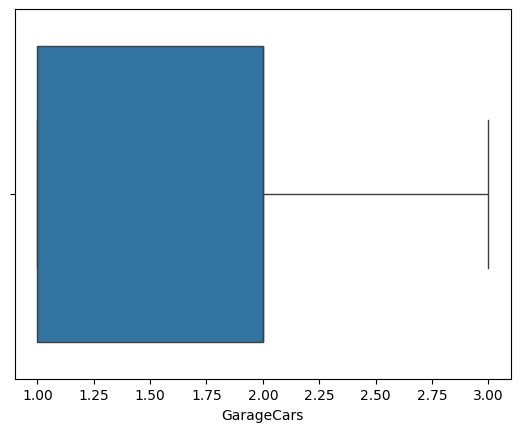

In [42]:
house_2 = house_2.dropna()
house_2.info()
sns.boxplot(data=house_2, x='GarageCars')

- Lakukan handling outliers untuk TotRmsAbvGrd

<class 'pandas.core.frame.DataFrame'>
Index: 4223 entries, 7 to 16597
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotRmsAbvGrd  4223 non-null   float64
 1   LotArea       4223 non-null   float64
 2   OverallCond   4223 non-null   int64  
 3   BsmtCond      4223 non-null   object 
 4   Functional    4223 non-null   object 
 5   GarageCond    4223 non-null   object 
 6   GarageCars    4223 non-null   float64
 7   YearBuilt     4223 non-null   int64  
 8   YrSold        4223 non-null   int64  
 9   CentralAir    4223 non-null   object 
 10  Street        4223 non-null   object 
 11  PavedDrive    4223 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 428.9+ KB


<Axes: xlabel='TotRmsAbvGrd'>

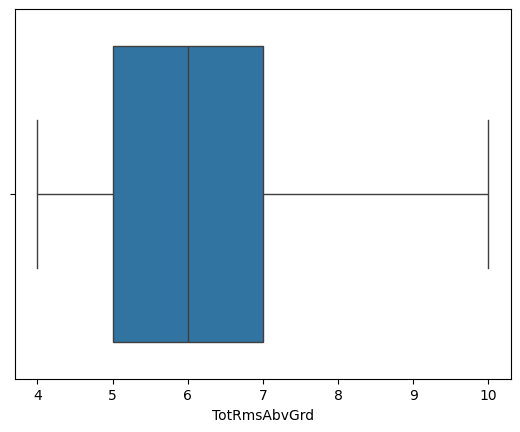

In [43]:
Q1 = house_2['TotRmsAbvGrd'].quantile(0.25)
Q3 = house_2['TotRmsAbvGrd'].quantile(0.75)
IQR = Q3 - Q1

lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

outliers_low = (house_2['TotRmsAbvGrd'] < lower_lim)
outliers_up = (house_2['TotRmsAbvGrd'] > upper_lim)
house_final = house_2['TotRmsAbvGrd'][~(outliers_low | outliers_up)]

house_3 = house_2.copy()
house_3['TotRmsAbvGrd'] = house_final

house_3 = house_3.dropna()
house_3.info()
sns.boxplot(data=house_3, x='TotRmsAbvGrd')

- Lakukan handling outliers untuk OverallCond

<class 'pandas.core.frame.DataFrame'>
Index: 4078 entries, 7 to 16597
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotRmsAbvGrd  4078 non-null   float64
 1   LotArea       4078 non-null   float64
 2   OverallCond   4078 non-null   float64
 3   BsmtCond      4078 non-null   object 
 4   Functional    4078 non-null   object 
 5   GarageCond    4078 non-null   object 
 6   GarageCars    4078 non-null   float64
 7   YearBuilt     4078 non-null   int64  
 8   YrSold        4078 non-null   int64  
 9   CentralAir    4078 non-null   object 
 10  Street        4078 non-null   object 
 11  PavedDrive    4078 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 414.2+ KB


<Axes: xlabel='OverallCond'>

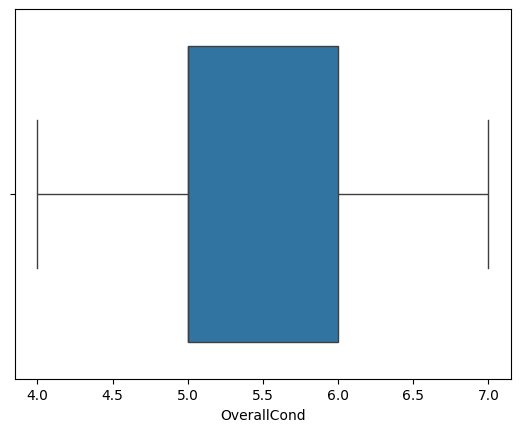

In [44]:
Q1 = house_3['OverallCond'].quantile(0.25)
Q3 = house_3['OverallCond'].quantile(0.75)
IQR = Q3 - Q1

lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

outliers_low = (house_3['OverallCond'] < lower_lim)
outliers_up = (house_3['OverallCond'] > upper_lim)
house_fin = house_3['OverallCond'][~(outliers_low | outliers_up)]

house_4 = house_3.copy()
house_4['OverallCond'] = house_fin

house_4 = house_4.dropna()
house_4.info()
sns.boxplot(data=house_4, x='OverallCond')

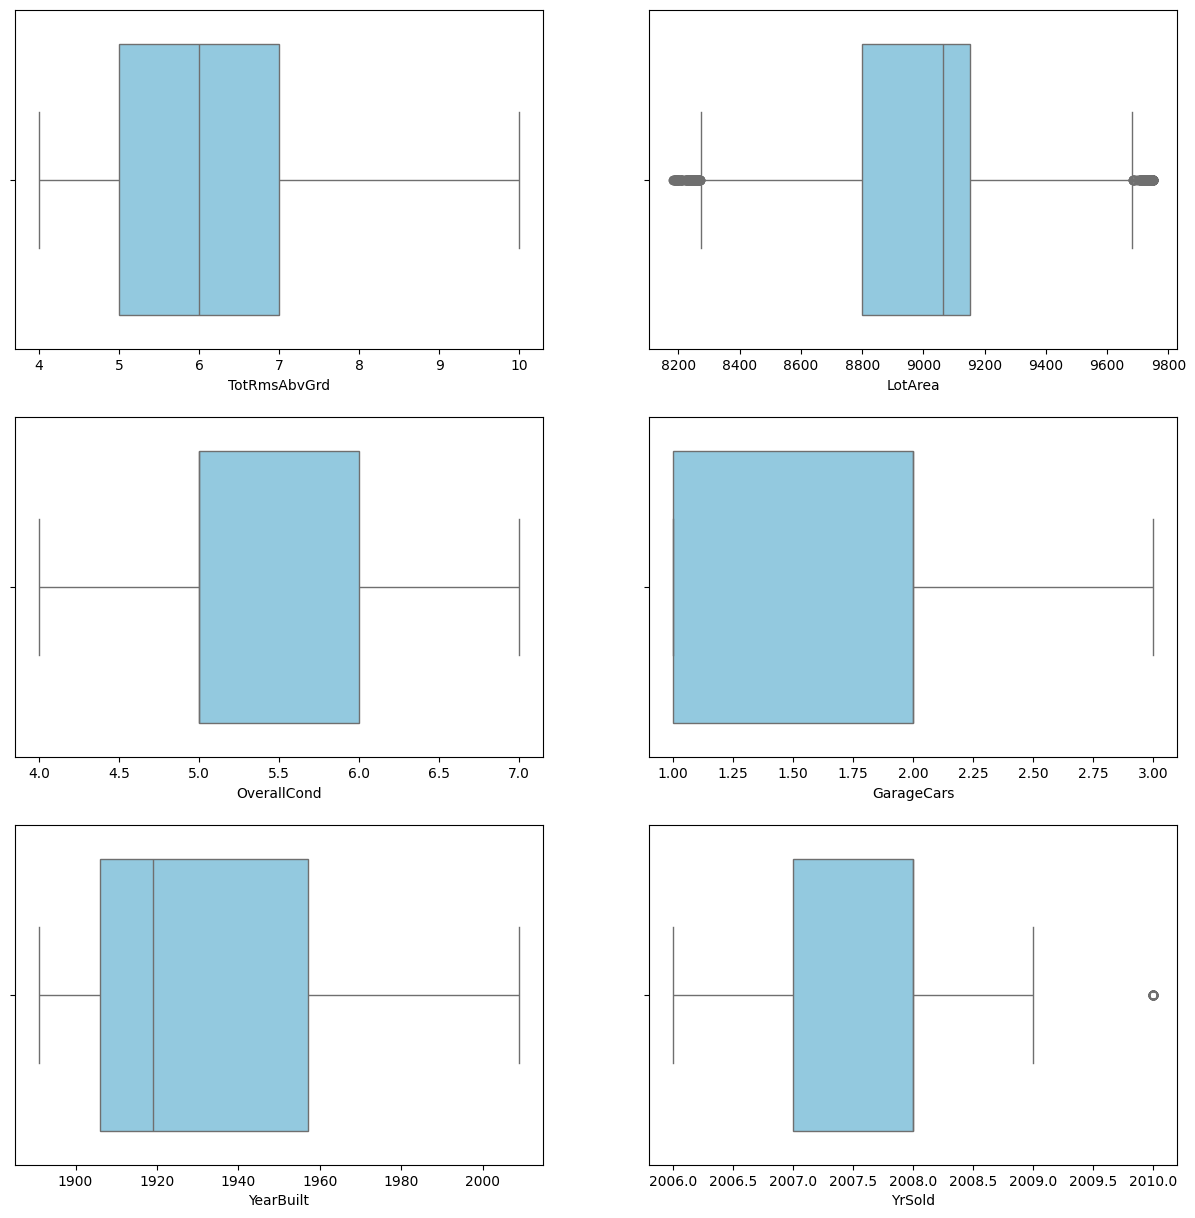

In [45]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.boxplot(data=house_4, x='TotRmsAbvGrd', ax=axes[0,0], color='skyblue')
sns.boxplot(data=house_4, x='LotArea', ax=axes[0,1], color='skyblue')
sns.boxplot(data=house_4, x='OverallCond', ax=axes[1,0], color='skyblue')
sns.boxplot(data=house_4, x='GarageCars', ax=axes[1,1], color='skyblue')
sns.boxplot(data=house_4, x='YearBuilt', ax=axes[2,0], color='skyblue')
sns.boxplot(data=house_4, x='YrSold', ax=axes[2,1], color='skyblue')

plt.show()

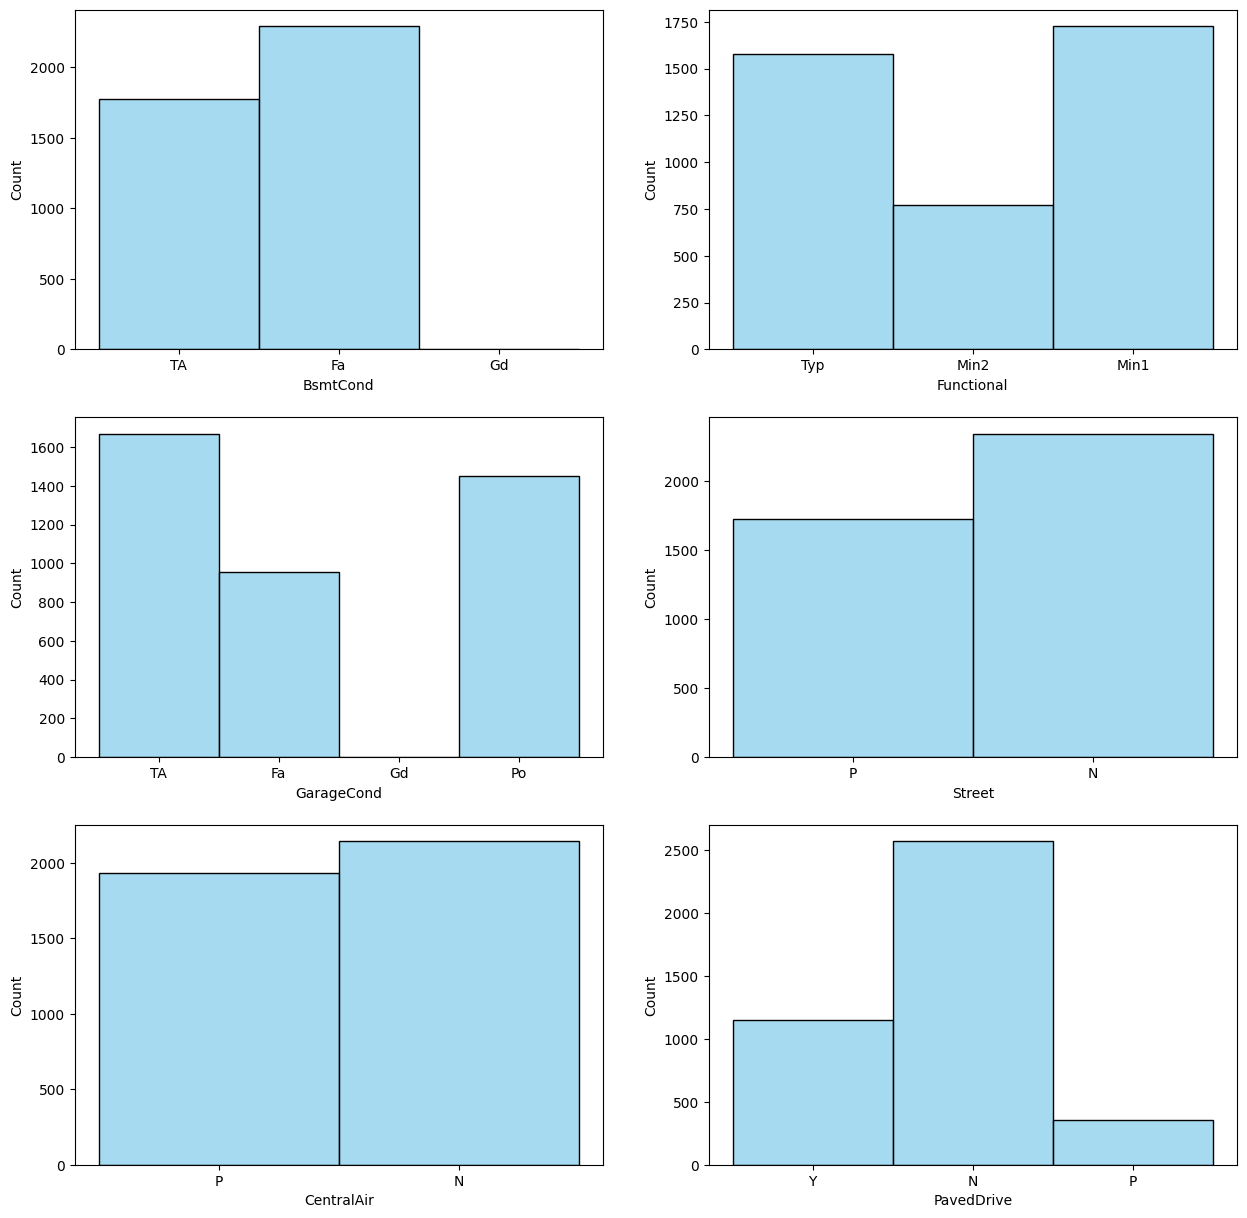

In [46]:
fig,axes = plt.subplots(3, 2, figsize=(15,15))

sns.histplot(data=house_4, x='BsmtCond', ax=axes[0,0], color='skyblue')
sns.histplot(data=house_4, x='Functional', ax=axes[0,1], color='skyblue')
sns.histplot(data=house_4, x='GarageCond', ax=axes[1,0], color='skyblue')
sns.histplot(data=house_4, x='Street', ax=axes[1,1], color='skyblue')
sns.histplot(data=house_4, x='CentralAir', ax=axes[2,0], color='skyblue')
sns.histplot(data=house_4, x='PavedDrive', ax=axes[2,1], color='skyblue')

plt.show()

In [47]:
house_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4078 entries, 7 to 16597
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotRmsAbvGrd  4078 non-null   float64
 1   LotArea       4078 non-null   float64
 2   OverallCond   4078 non-null   float64
 3   BsmtCond      4078 non-null   object 
 4   Functional    4078 non-null   object 
 5   GarageCond    4078 non-null   object 
 6   GarageCars    4078 non-null   float64
 7   YearBuilt     4078 non-null   int64  
 8   YrSold        4078 non-null   int64  
 9   CentralAir    4078 non-null   object 
 10  Street        4078 non-null   object 
 11  PavedDrive    4078 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 414.2+ KB


# **Exploratory Data Analysis (EDA)**

**Pisahkan data menjadi numerik dan kategorikal**

In [48]:
house_new_num = house.select_dtypes('number')
house_new_cat = house.select_dtypes('object')

In [49]:
house_new_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotRmsAbvGrd  1459 non-null   int64  
 1   LotArea       1459 non-null   int64  
 2   OverallCond   1459 non-null   int64  
 3   GarageCars    1458 non-null   float64
 4   YearBuilt     1459 non-null   int64  
 5   YrSold        1459 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 68.5 KB


In [50]:
house_new_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Street      1459 non-null   object
 1   CentralAir  1459 non-null   object
 2   BsmtCond    1414 non-null   object
 3   Functional  1457 non-null   object
 4   GarageCond  1381 non-null   object
 5   PavedDrive  1459 non-null   object
dtypes: object(6)
memory usage: 68.5+ KB


**Tipe-tipe data**
- Ordinal:
    OverallCond, BsmtCond, Functional, GarageCond

- Nominal:
    PavedDrive, CentralAir, Street

- Continous:
    LotArea

- Discrete:
    TotRmsAbvGrd, YearBuilt, YrSold, GarageCars

**Penjelasan fitur**

- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- LotArea: Lot size in square feet
- Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

- OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
- CentralAir: Central air conditioning

       N	No
       Y	Yes
	
- BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
 
- Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

- GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

- GarageCars: Size of garage in car capacity

- PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

- YearBuilt: Original construction date

- YrSold: Year Sold (YYYY)

**Mean, Median, dan Modus**

- Mean digunakan untuk mencari rata-rata sebagai pemusatan data dan memberikan gambaran yang baik mengenai titik pusat data jika tidak ada outlier.

In [51]:
import numpy as np

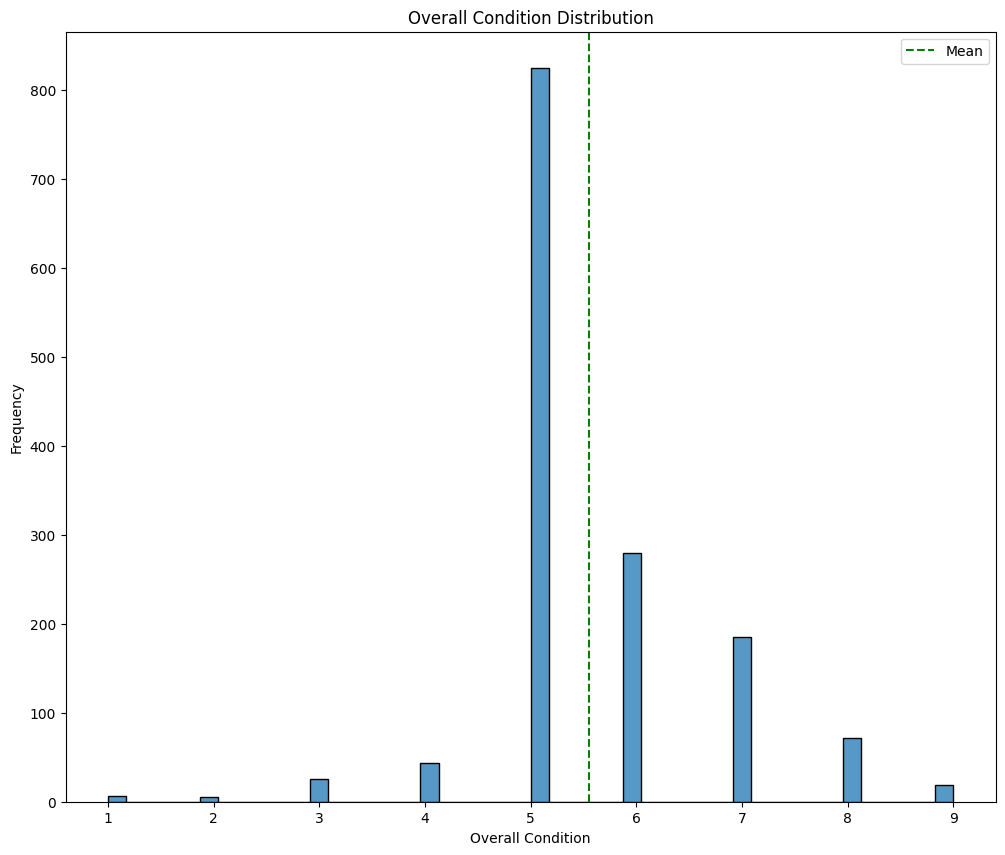

In [52]:
plt.figure(figsize= (12, 10))
sns.histplot(house_new_num['OverallCond'])

plt.axvline(np.mean(house_new_num['OverallCond']), c='green', linestyle='--', label='Mean')

plt.xlabel('Overall Condition')
plt.ylabel('Frequency')
plt.title('Overall Condition Distribution')

plt.legend()
plt.show()

Berdasarkan histplot di atas, data tersebut berpotensi untuk memiliki distribusi yang normal karena nilai median tidak terlalu jauh dari nilai dengan frekuensi terbanyak.

- Median digunakan untuk mencari data tengah ketika data diurutkan dari kecil ke besar, sehingga cocok untuk data yang memiliki outlier signifikan.

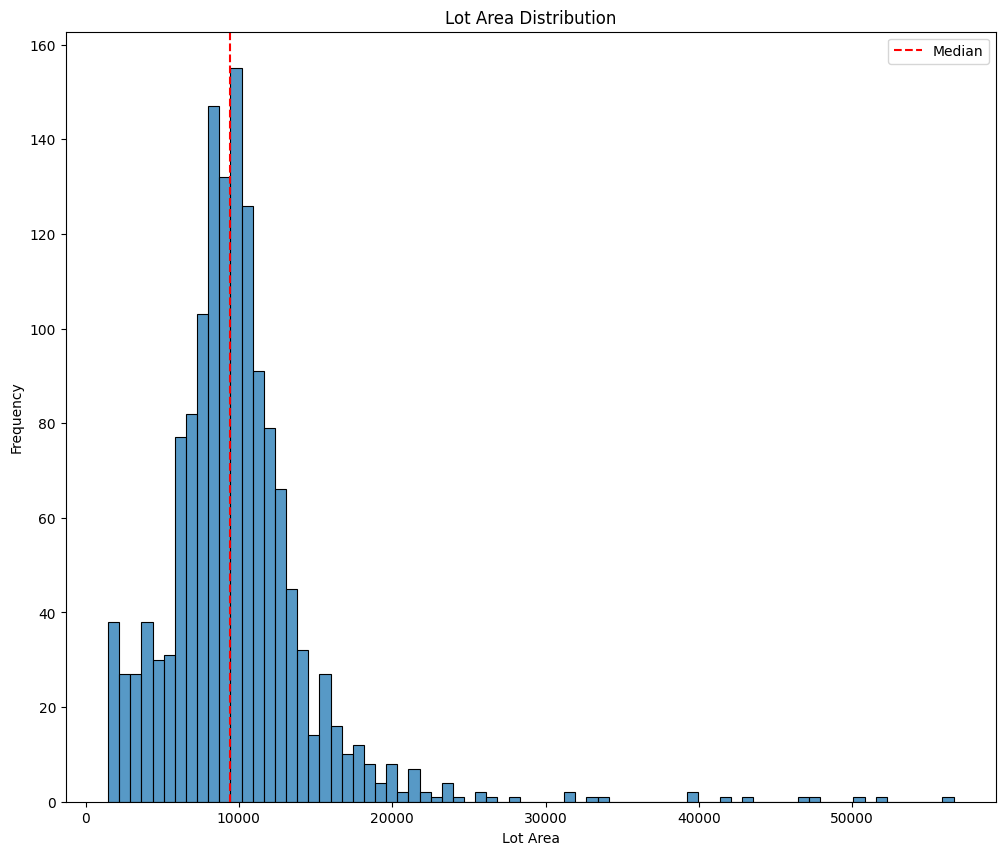

In [53]:
plt.figure(figsize= (12, 10))
sns.histplot(house_new_num['LotArea'])

plt.axvline(np.median(house_new_num['LotArea']), c='red', linestyle='--', label='Median')

plt.xlabel('Lot Area')
plt.ylabel('Frequency')
plt.title('Lot Area Distribution')

plt.legend()
plt.show()

Berdasarkan histplot di atas, data tersebut berpotensi untuk memiliki distribusi yang normal jika outlier dapat di handle untuk menghilangkan nilai ekstrim.

- Modus sebagai nilai yang paling sering muncul dalam data, dapat digunakan untuk data bersifat kategorikal. Modus memberikan informasi mengenai nilai atau kategori yang paling umum.

In [54]:
import statistics as st

Mode: Typ


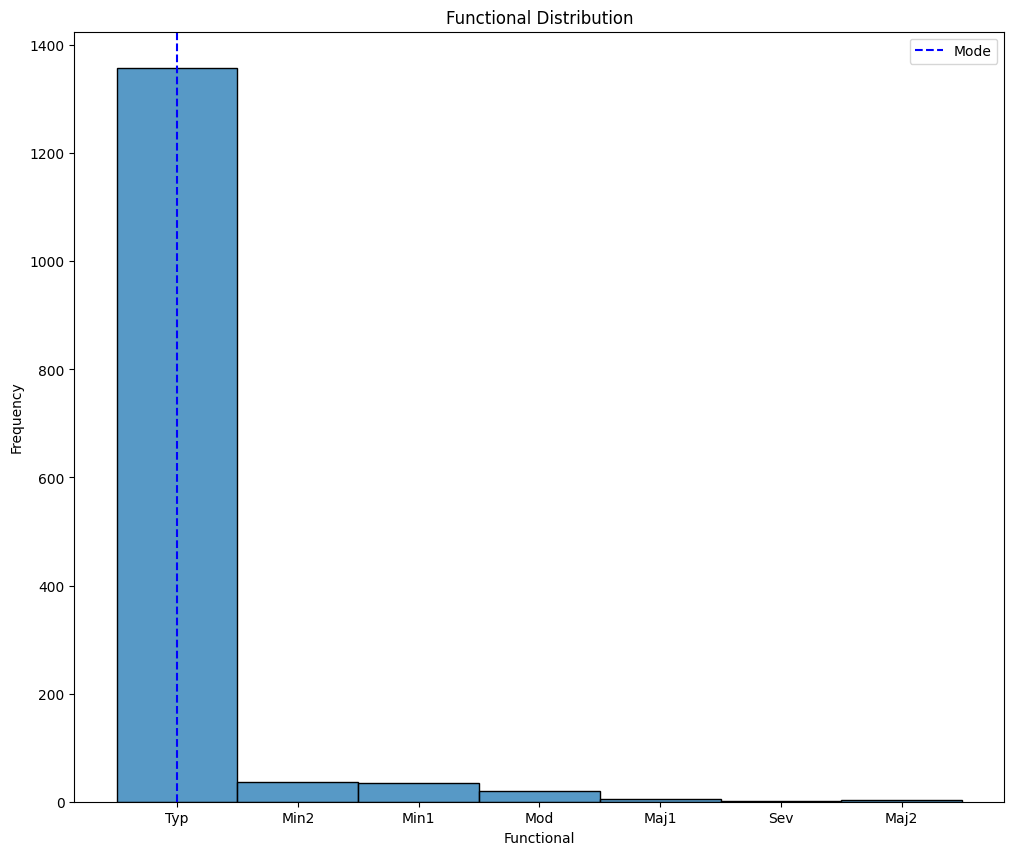

In [55]:
plt.figure(figsize= (12, 10))
sns.histplot(house_new_cat['Functional'])

plt.axvline(st.mode(house_new_cat['Functional']), c='blue', linestyle='--', label='Mode')

plt.xlabel('Functional')
plt.ylabel('Frequency')
plt.title('Functional Distribution')

print(f"Mode: {st.mode(house_new_cat['Functional'])}")

plt.legend()
plt.show()

Berdasarkan diagram di atas, nilai Typ menjadi modus dari data Functional karena memiliki frekuensi terbanyak.

**Statistical Five Summaries**

In [56]:
house_new_num.describe()

,TotRmsAbvGrd,LotArea,OverallCond,GarageCars,YearBuilt,YrSold
count,1459.000000,1459.000000,1459.000000,1458.000000,1459.000000,1459.000000
mean,6.385195,9819.161069,5.553804,1.766118,1971.357779,2007.769705
std,1.508895,4955.517327,1.113740,0.775945,30.390071,1.301740
min,3.000000,1470.000000,1.000000,0.000000,1879.000000,2006.000000
25%,5.000000,7391.000000,5.000000,1.000000,1953.000000,2007.000000
50%,6.000000,9399.000000,5.000000,2.000000,1973.000000,2008.000000
75%,7.000000,11517.500000,6.000000,2.000000,2001.000000,2009.000000
max,15.000000,56600.000000,9.000000,5.000000,2010.000000,2010.000000


Pada dataset house_new_final, nilai dari five statistical summaries yang bisa diambil:
- TotRmsAbvGrd
        
        Min             : 3
        Max             : 15
        Lower Quartile  : 5
        Median          : 6
        Upper Quartile  : 7

- LotArea
        
        Min             : 1470
        Max             : 56600
        Lower Quartile  : 7391
        Median          : 9399
        Upper Quartile  : 11517.5

- OverallCond
        
        Min             : 1
        Max             : 9
        Lower Quartile  : 5
        Median          : 5
        Upper Quartile  : 6

- GarageCars
        
        Min             : 0
        Max             : 5
        Lower Quartile  : 1
        Median          : 2
        Upper Quartile  : 2

- YearBuilt
        
        Min             : 1879
        Max             : 2010
        Lower Quartile  : 1953
        Median          : 1973
        Upper Quartile  : 2001

- YrSold
        
        Min             : 2006
        Max             : 2010
        Lower Quartile  : 2007
        Median          : 2008
        Upper Quartile  : 2009

**Distribusi Data**

In [57]:
import numpy as np

In [58]:
house_new_num.describe()

,TotRmsAbvGrd,LotArea,OverallCond,GarageCars,YearBuilt,YrSold
count,1459.000000,1459.000000,1459.000000,1458.000000,1459.000000,1459.000000
mean,6.385195,9819.161069,5.553804,1.766118,1971.357779,2007.769705
std,1.508895,4955.517327,1.113740,0.775945,30.390071,1.301740
min,3.000000,1470.000000,1.000000,0.000000,1879.000000,2006.000000
25%,5.000000,7391.000000,5.000000,1.000000,1953.000000,2007.000000
50%,6.000000,9399.000000,5.000000,2.000000,1973.000000,2008.000000
75%,7.000000,11517.500000,6.000000,2.000000,2001.000000,2009.000000
max,15.000000,56600.000000,9.000000,5.000000,2010.000000,2010.000000


- Persebaran data numerik dalam grafik

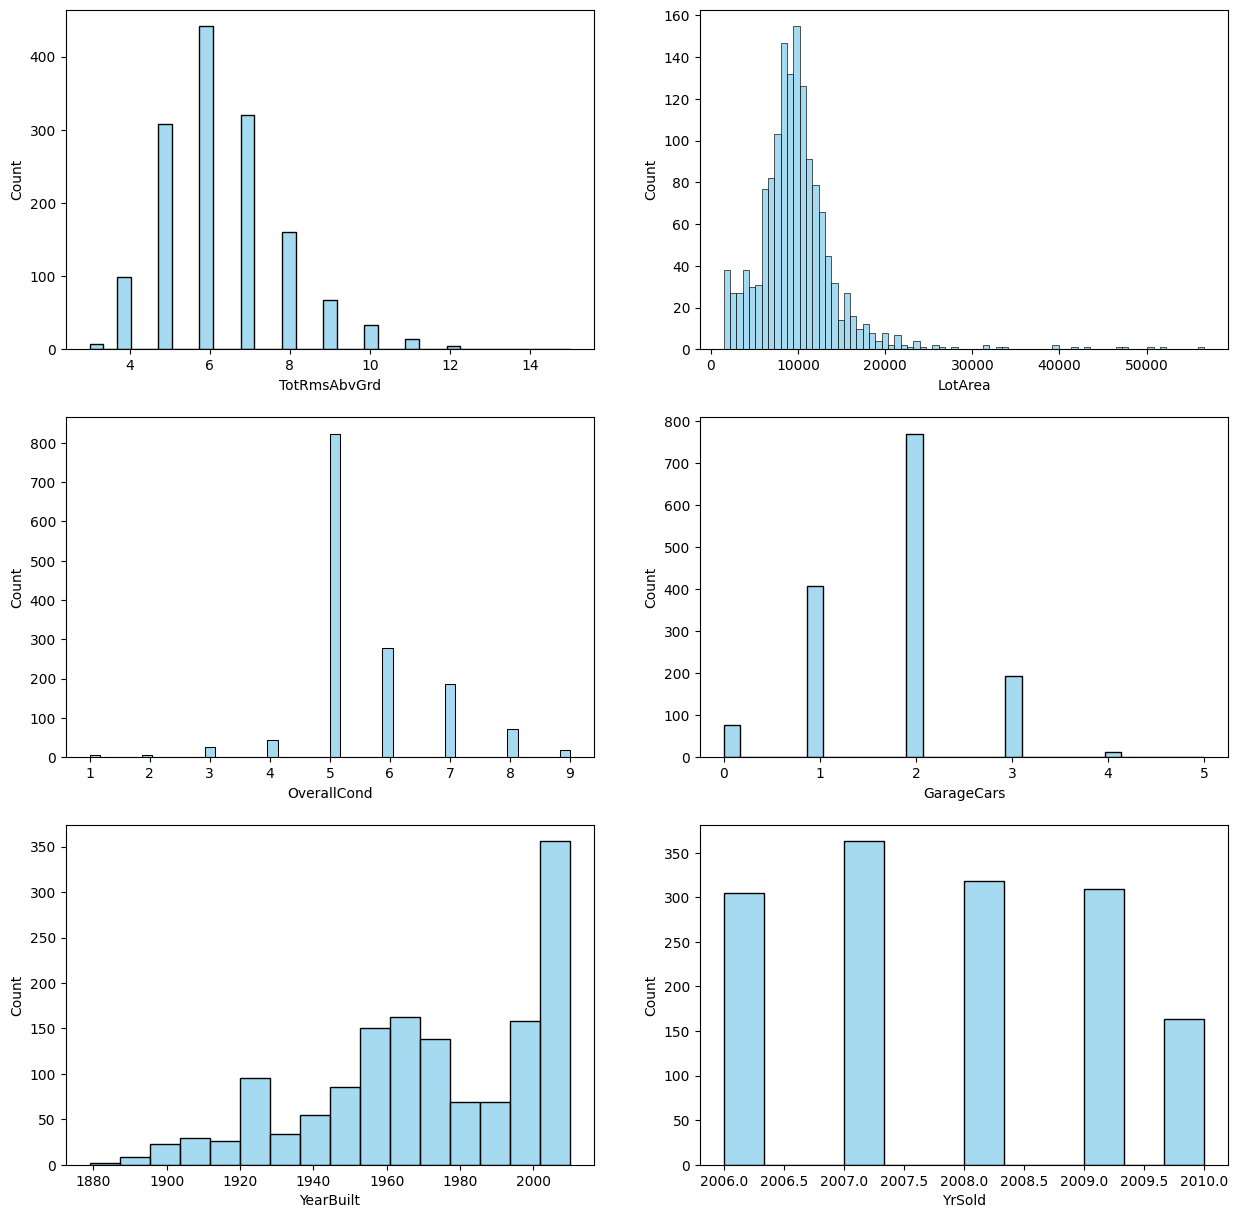

In [59]:
fig,axes = plt.subplots(3, 2, figsize=(15,15))

sns.histplot(data=house, x='TotRmsAbvGrd', ax=axes[0,0], color='skyblue')
sns.histplot(data=house, x='LotArea', ax=axes[0,1], color='skyblue')
sns.histplot(data=house, x='OverallCond', ax=axes[1,0], color='skyblue')
sns.histplot(data=house, x='GarageCars', ax=axes[1,1], color='skyblue')
sns.histplot(data=house, x='YearBuilt', ax=axes[2,0], color='skyblue')
sns.histplot(data=house, x='YrSold', ax=axes[2,1], color='skyblue')

plt.show()

Grafik di atas, menunjukkan bahwa hampir semua data bersifat numerik, memilik distribusi yang tidak normal, dengan beberapa memiliki distribusi yang right-skewed, seperti LotArea dan TotRmsAbvGrd

- Persebaran data kategorikal dalam grafik

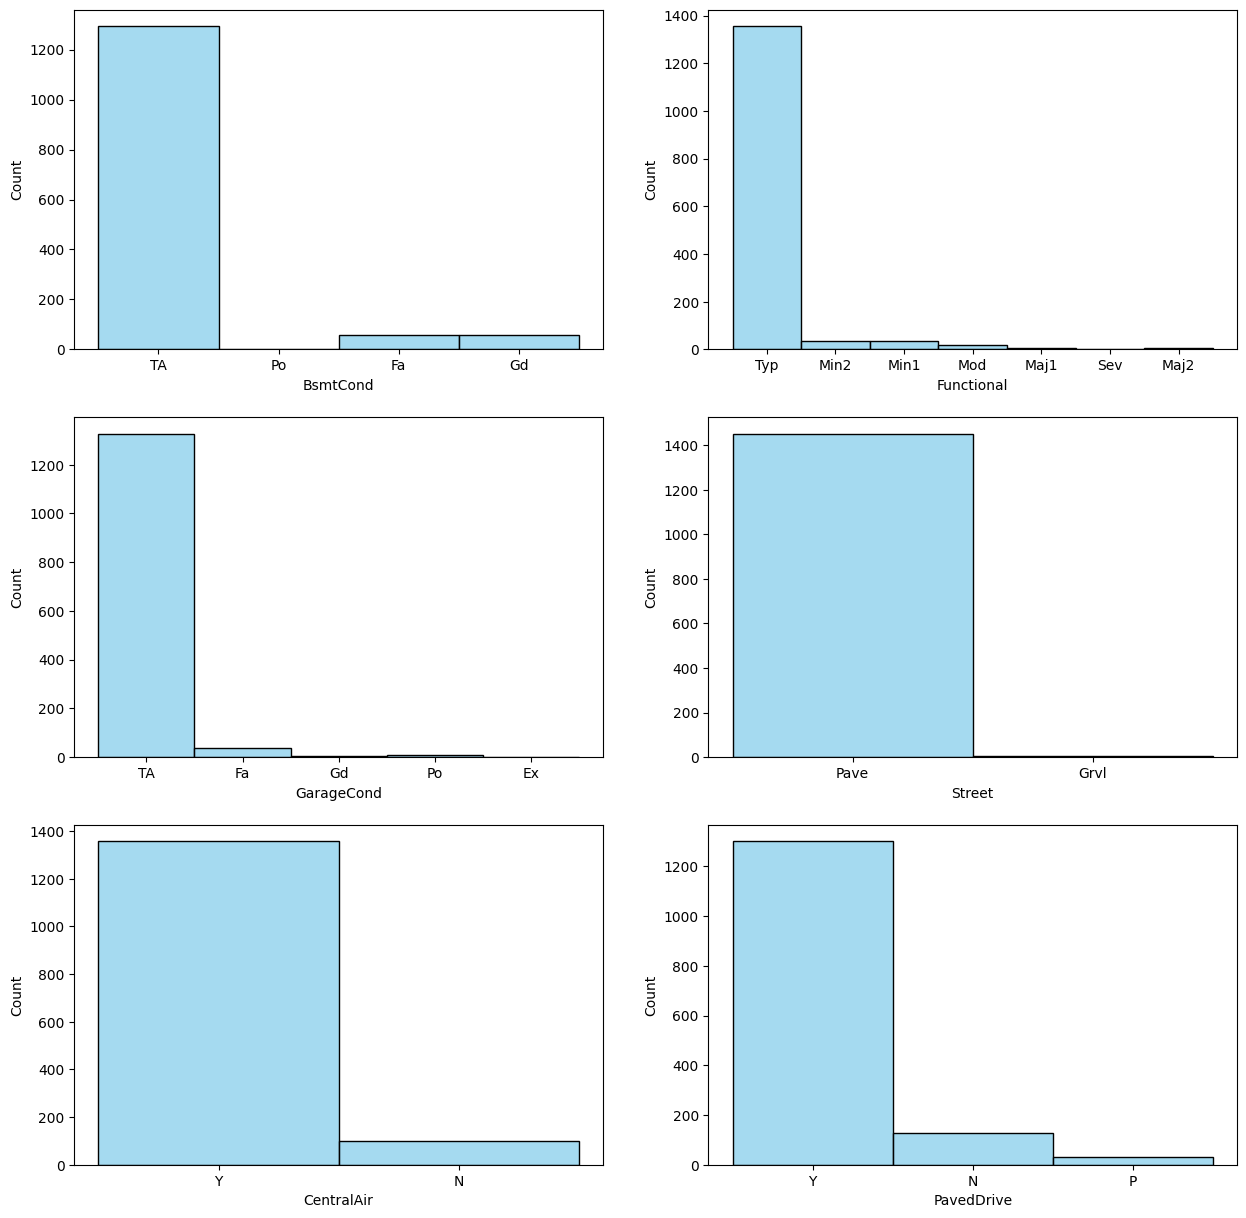

In [60]:
fig,axes = plt.subplots(3, 2, figsize=(15,15))

sns.histplot(data=house, x='BsmtCond', ax=axes[0,0], color='skyblue')
sns.histplot(data=house, x='Functional', ax=axes[0,1], color='skyblue')
sns.histplot(data=house, x='GarageCond', ax=axes[1,0], color='skyblue')
sns.histplot(data=house, x='Street', ax=axes[1,1], color='skyblue')
sns.histplot(data=house, x='CentralAir', ax=axes[2,0], color='skyblue')
sns.histplot(data=house, x='PavedDrive', ax=axes[2,1], color='skyblue')

plt.show()

Data di atas menunjukkan bahwa semua data yang bersifat kategorikal, mengalami imbalanced data sehingga perlu dilakukan balancing.

# **Feature Engineering**

In [61]:
house_final_num = house_4.select_dtypes('number')
house_final_cat = house_4.select_dtypes('object')

In [62]:
house_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4078 entries, 7 to 16597
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotRmsAbvGrd  4078 non-null   float64
 1   LotArea       4078 non-null   float64
 2   OverallCond   4078 non-null   float64
 3   BsmtCond      4078 non-null   object 
 4   Functional    4078 non-null   object 
 5   GarageCond    4078 non-null   object 
 6   GarageCars    4078 non-null   float64
 7   YearBuilt     4078 non-null   int64  
 8   YrSold        4078 non-null   int64  
 9   CentralAir    4078 non-null   object 
 10  Street        4078 non-null   object 
 11  PavedDrive    4078 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 414.2+ KB


**1. Garage Condition Rating**

In [63]:
GarageRatings = {
    'Ex': 90,
    'Gd': 80,
    'TA': 70,
    'Fa': 60,
    'Po': 50,
    'NA': 0  
}
house_new_final_grg = house_4.copy()
house_new_final_grg['Rt'] = house_4['GarageCond'].map(GarageRatings)
house_new_final_grg['GarageRate'] = ((house_new_final_grg['Rt'] + 10 * house_new_final_grg['GarageCars']) / 4).astype(int)

min_rating = house_new_final_grg['GarageRate'].min()
max_rating = house_new_final_grg['GarageRate'].max()
house_new_final_grg['GarageRate'] = ((house_new_final_grg['GarageRate'] - min_rating) / (max_rating - min_rating)) * 9

house_new_final_grg['GarageRate'] += 1
house_new_final_grg['GarageRate'] = house_new_final_grg['GarageRate'].round(1)

In [64]:
house_new_final_grg = house_new_final_grg.drop(['Rt'], axis=1)

- Hasil:

In [65]:
house_new_final_grg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4078 entries, 7 to 16597
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotRmsAbvGrd  4078 non-null   float64
 1   LotArea       4078 non-null   float64
 2   OverallCond   4078 non-null   float64
 3   BsmtCond      4078 non-null   object 
 4   Functional    4078 non-null   object 
 5   GarageCond    4078 non-null   object 
 6   GarageCars    4078 non-null   float64
 7   YearBuilt     4078 non-null   int64  
 8   YrSold        4078 non-null   int64  
 9   CentralAir    4078 non-null   object 
 10  Street        4078 non-null   object 
 11  PavedDrive    4078 non-null   object 
 12  GarageRate    4078 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 446.0+ KB


In [66]:
house_new_final_grg.head()

,TotRmsAbvGrd,LotArea,OverallCond,BsmtCond,Functional,GarageCond,GarageCars,YearBuilt,YrSold,CentralAir,Street,PavedDrive,GarageRate
7,7.0,8402.0,5.0,TA,Typ,TA,2.0,1998,2010,P,P,Y,6.2
9,4.0,8400.0,5.0,TA,Typ,TA,2.0,1970,2010,P,P,Y,6.2
25,7.0,8577.0,5.0,TA,Typ,TA,2.0,2004,2010,P,P,Y,6.2
27,6.0,8987.0,5.0,TA,Typ,TA,3.0,2005,2010,P,P,Y,8.5
28,4.0,9215.0,5.0,TA,Typ,TA,2.0,2009,2010,P,P,Y,6.2


Fitur ini menggabungkan 'GarageCond' dan 'GarageCars', dimana semakin bagus kondisi garasi dan semakin banyak mobil yang bisa muat, maka rating nya akan semakin tinggi dalam skala 1-10.

**2. HouseAge**

In [67]:
house_new_final_hag = house_new_final_grg.copy()
house_new_final_hag['HouseAge'] = house_new_final_hag['YrSold'] - house_new_final_hag['YearBuilt']

In [68]:
house_new_final_hag.head()

,TotRmsAbvGrd,LotArea,OverallCond,BsmtCond,Functional,GarageCond,GarageCars,YearBuilt,YrSold,CentralAir,Street,PavedDrive,GarageRate,HouseAge
7,7.0,8402.0,5.0,TA,Typ,TA,2.0,1998,2010,P,P,Y,6.2,12
9,4.0,8400.0,5.0,TA,Typ,TA,2.0,1970,2010,P,P,Y,6.2,40
25,7.0,8577.0,5.0,TA,Typ,TA,2.0,2004,2010,P,P,Y,6.2,6
27,6.0,8987.0,5.0,TA,Typ,TA,3.0,2005,2010,P,P,Y,8.5,5
28,4.0,9215.0,5.0,TA,Typ,TA,2.0,2009,2010,P,P,Y,6.2,1


Usia rumah ketika rumah dijual, dihitung berdasarkan YrSold - YearBuilt.

**3. FunctionalScore**

In [86]:
functional_scores = {
    'Typ': 5, 
    'Min1': 4,
    'Min2': 3,
    'Mod': 2, 
    'Maj1': 1,
    'Maj2': 0,
    'Sev': -1,
    'Sal': -2
}

house_new_final_fs = house_new_final_hag.copy()

house_new_final_fs['FunctionalScore'] = house_new_final_fs['Functional'].map(functional_scores)

In [93]:
house_new_final = house_new_final_fs.copy()

house_new_final.insert(5, 'FunctionalScore', house_new_final.pop('FunctionalScore'))
house_new_final.insert(10, 'HouseAge', house_new_final.pop('HouseAge'))
house_new_final.insert(8, 'GarageRate', house_new_final.pop('GarageRate'))

In [97]:
house_new_final.head()

,TotRmsAbvGrd,LotArea,OverallCond,BsmtCond,Functional,FunctionalScore,GarageCond,GarageCars,GarageRate,YearBuilt,YrSold,HouseAge,CentralAir,Street,PavedDrive
7,7.0,8402.0,5.0,TA,Typ,5,TA,2.0,6.2,1998,2010,12,P,P,Y
9,4.0,8400.0,5.0,TA,Typ,5,TA,2.0,6.2,1970,2010,40,P,P,Y
25,7.0,8577.0,5.0,TA,Typ,5,TA,2.0,6.2,2004,2010,6,P,P,Y
27,6.0,8987.0,5.0,TA,Typ,5,TA,3.0,8.5,2005,2010,5,P,P,Y
28,4.0,9215.0,5.0,TA,Typ,5,TA,2.0,6.2,2009,2010,1,P,P,Y


Skor numerik untuk merepresentasikan fungsionalitas rumah. Semakin tinggi skor, makan semakin bagus fungsionalitas rumah tersebut.

**4. Encode Data**

In [139]:
house_en = house_new_final.copy()

bsmtcond_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
functional_mapping = {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0}
garagecond_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}

house_en['BsmtCond'] = house_en['BsmtCond'].map(bsmtcond_mapping)
house_en['Functional'] = house_en['Functional'].map(functional_mapping)
house_en['GarageCond'] = house_en['GarageCond'].map(garagecond_mapping)

house_en['Street'] = en.fit_transform(house_new_final['Street'].values)
house_en['CentralAir'] = en.fit_transform(house_new_final['CentralAir'].values)
house_en['PavedDrive'] = en.fit_transform(house_new_final['PavedDrive'].values)

In [140]:
corr = house_en.corr(method = 'spearman')

<Axes: >

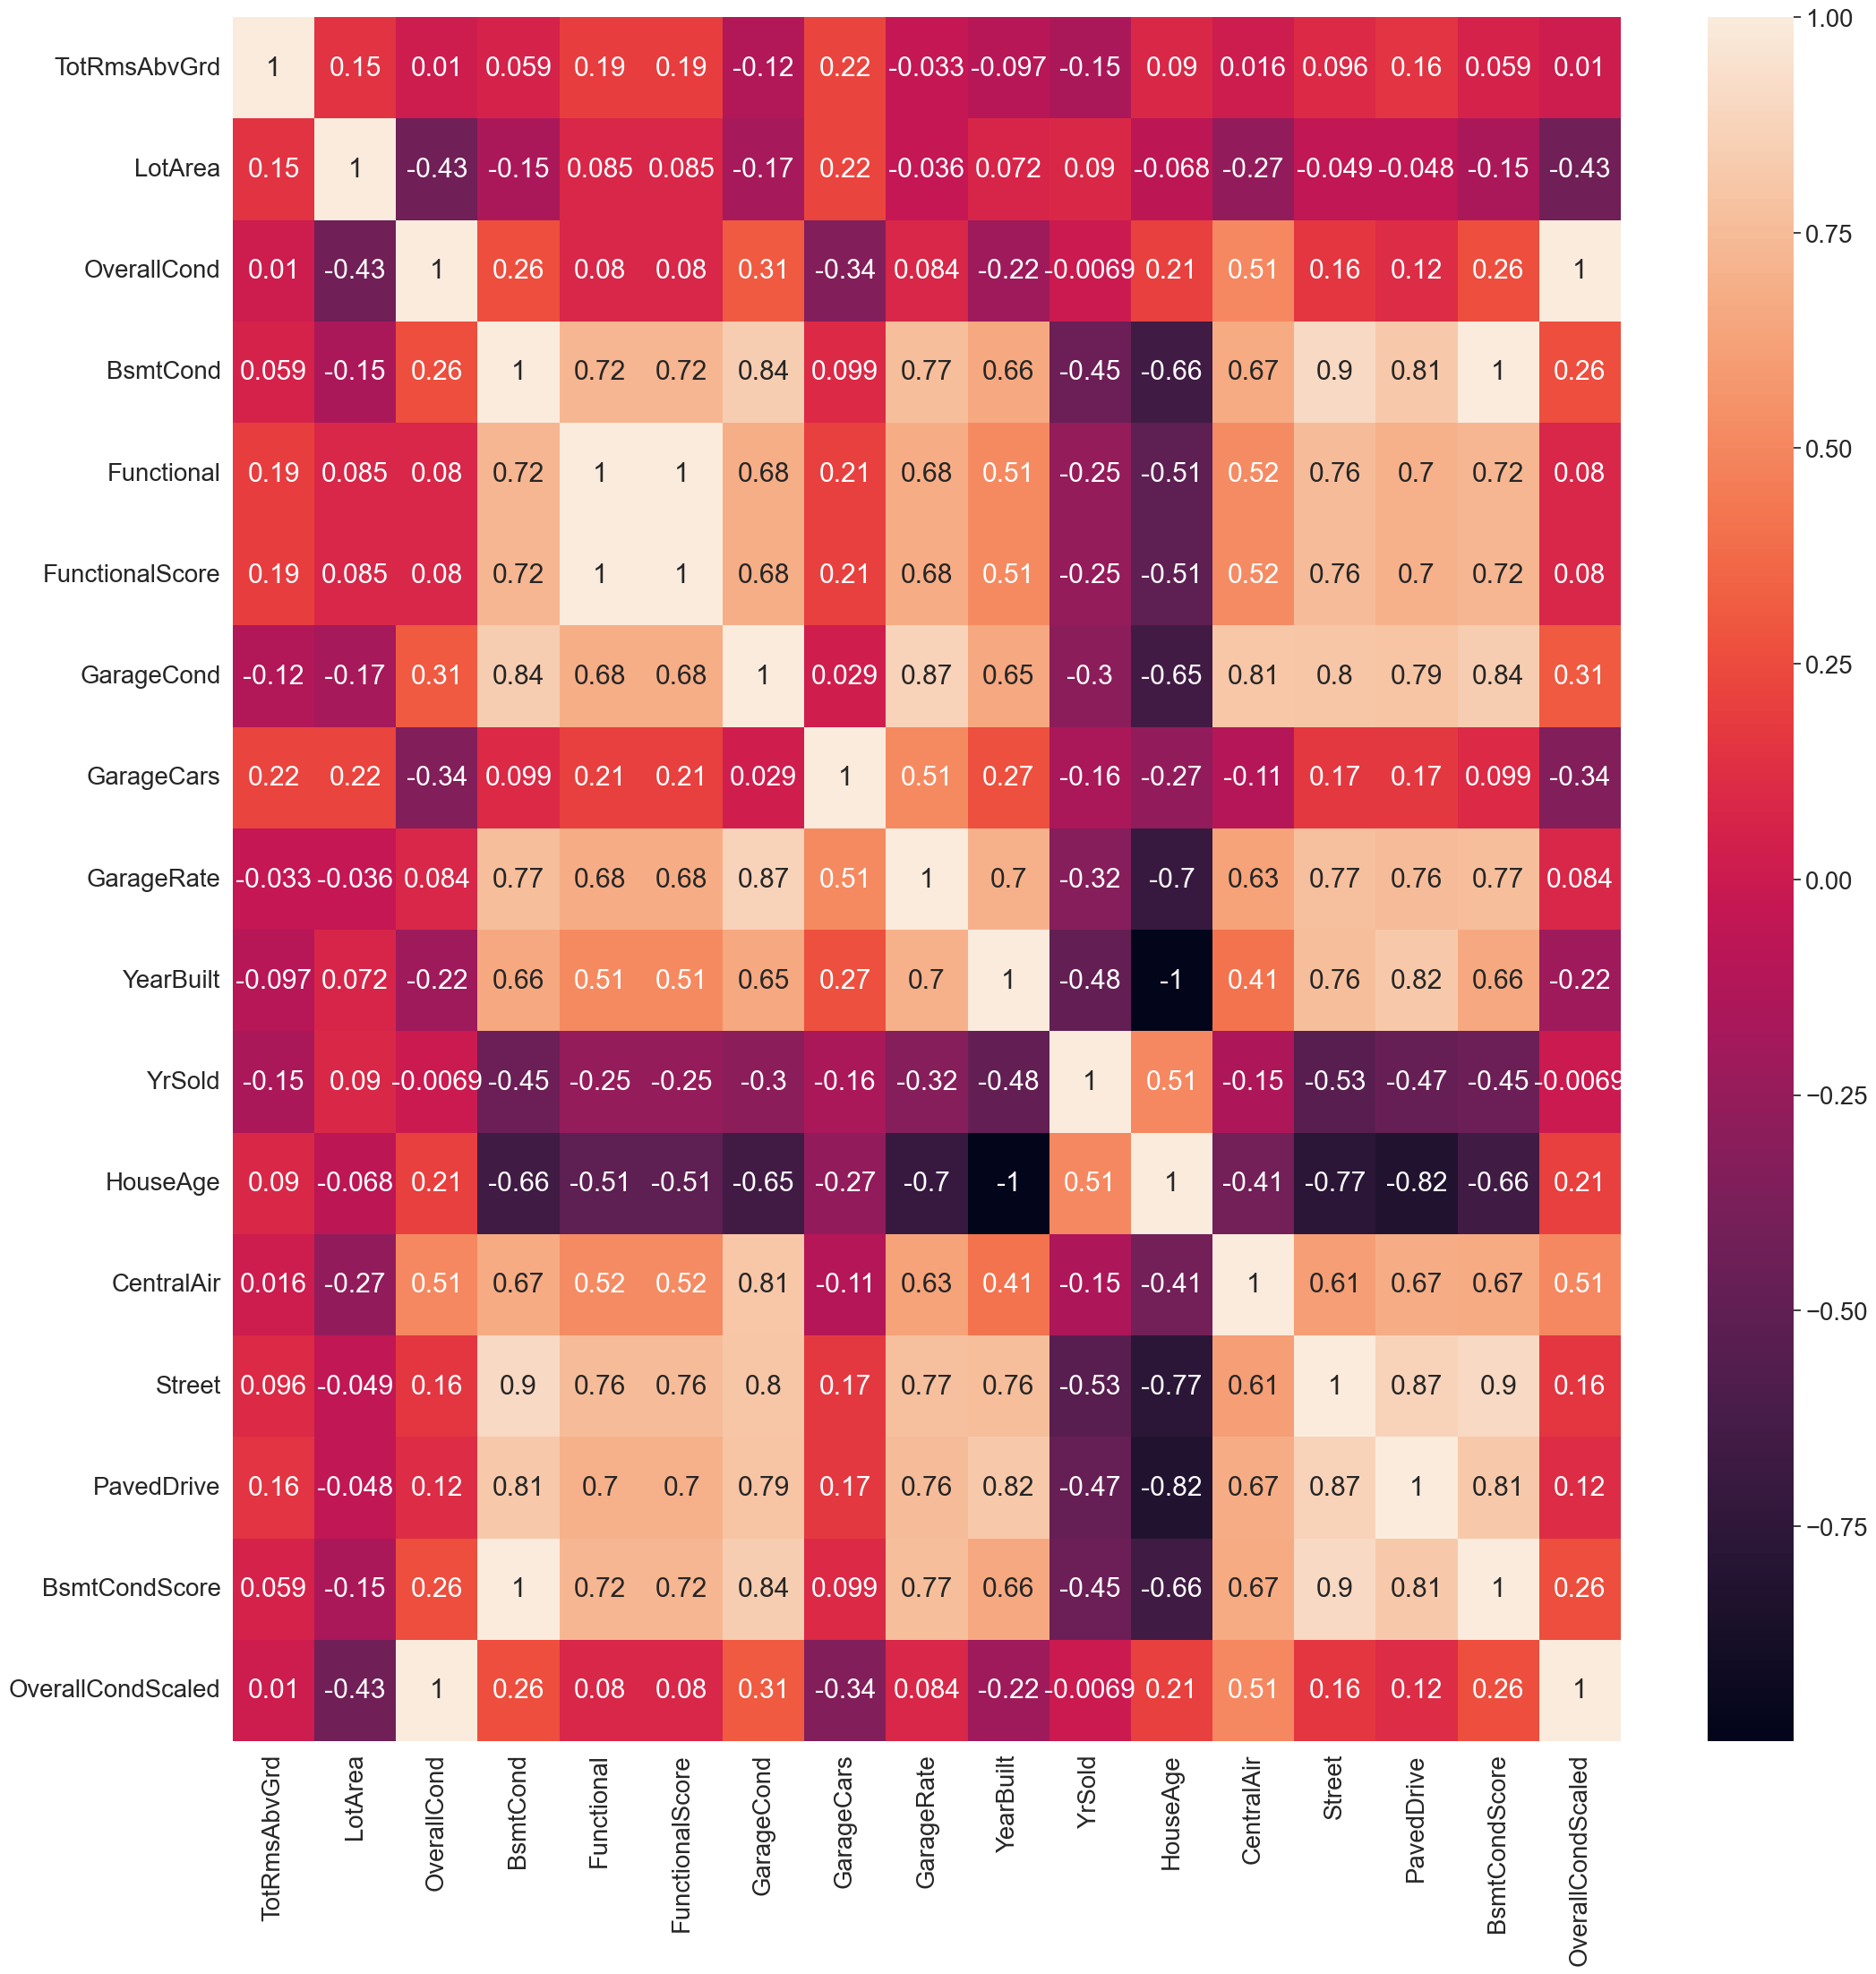

In [141]:
plt.figure(figsize=(25,25))
sns.set(font_scale = 1.8)
sns.heatmap(corr, annot=True)

**5. FinalHouseRate**

In [145]:
house_new_hcr = house_new_final.copy()

bsmt_scores = {'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 1, 'NA': 0}
functional_scores = {'Typ': 9, 'Min1': 7, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0}

house_new_hcr['BsmtCondScore'] = house_new_hcr['BsmtCond'].map(bsmt_scores)
house_new_hcr['FunctionalScore'] = house_new_hcr['Functional'].map(functional_scores)
house_new_hcr['OverallCondScaled'] = (house_new_hcr['OverallCond'] / 10) * 9 + 1

house_new_hcr['FinalHouseRate'] = (house_new_hcr['BsmtCondScore'] + house_new_hcr['OverallCondScaled'] + house_new_final['FunctionalScore']) / 3

In [146]:
house_new_hcr = house_new_hcr.drop(['OverallCondScaled'], axis=1)

In [147]:
house_new_hcr.head()

,TotRmsAbvGrd,LotArea,OverallCond,BsmtCond,Functional,FunctionalScore,GarageCond,GarageCars,GarageRate,YearBuilt,YrSold,HouseAge,CentralAir,Street,PavedDrive,BsmtCondScore,FinalHouseRate
7,7.0,8402.0,5.0,TA,Typ,9,TA,2.0,6.2,1998,2010,12,P,P,Y,5,6.5
9,4.0,8400.0,5.0,TA,Typ,9,TA,2.0,6.2,1970,2010,40,P,P,Y,5,6.5
25,7.0,8577.0,5.0,TA,Typ,9,TA,2.0,6.2,2004,2010,6,P,P,Y,5,6.5
27,6.0,8987.0,5.0,TA,Typ,9,TA,3.0,8.5,2005,2010,5,P,P,Y,5,6.5
28,4.0,9215.0,5.0,TA,Typ,9,TA,2.0,6.2,2009,2010,1,P,P,Y,5,6.5


Nilai rating keseluruhan rumah berdasarkan Functional, BsmtCond, dan FunctionalScore

**6. OverallCondCat**

In [148]:
house_new_occ = house_new_hcr.copy()

def categorize_overall_cond(overall_cond):
    if overall_cond >= 8:
        return 'Excellent'
    elif 6 <= overall_cond <= 7:
        return 'Good'
    elif 4 <= overall_cond <= 5:
        return 'Average'
    else:
        return 'Poor'

house_new_occ['OverallCondCat'] = house_new_occ['OverallCond'].apply(categorize_overall_cond)

In [149]:
house_new_occ.head()

,TotRmsAbvGrd,LotArea,OverallCond,BsmtCond,Functional,FunctionalScore,GarageCond,GarageCars,GarageRate,YearBuilt,YrSold,HouseAge,CentralAir,Street,PavedDrive,BsmtCondScore,FinalHouseRate,OverallCondCat
7,7.0,8402.0,5.0,TA,Typ,9,TA,2.0,6.2,1998,2010,12,P,P,Y,5,6.5,Average
9,4.0,8400.0,5.0,TA,Typ,9,TA,2.0,6.2,1970,2010,40,P,P,Y,5,6.5,Average
25,7.0,8577.0,5.0,TA,Typ,9,TA,2.0,6.2,2004,2010,6,P,P,Y,5,6.5,Average
27,6.0,8987.0,5.0,TA,Typ,9,TA,3.0,8.5,2005,2010,5,P,P,Y,5,6.5,Average
28,4.0,9215.0,5.0,TA,Typ,9,TA,2.0,6.2,2009,2010,1,P,P,Y,5,6.5,Average


**7. TotRmsRatio**

In [158]:
house_new_trr = house_new_occ.copy()

house_new_trr['TotRmsRatio'] = (house_new_trr['TotRmsAbvGrd'] / house_new_trr['LotArea']) * 1000

In [159]:
house_new_trr.insert(1, 'TotRmsRatio', house_new_trr.pop('TotRmsRatio'))

In [160]:
house_new_trr.head()

,TotRmsAbvGrd,TotRmsRatio,LotArea,OverallCond,BsmtCond,Functional,FunctionalScore,GarageCond,GarageCars,GarageRate,YearBuilt,YrSold,HouseAge,CentralAir,Street,PavedDrive,BsmtCondScore,FinalHouseRate,OverallCondCat
7,7.0,0.833135,8402.0,5.0,TA,Typ,9,TA,2.0,6.2,1998,2010,12,P,P,Y,5,6.5,Average
9,4.0,0.476190,8400.0,5.0,TA,Typ,9,TA,2.0,6.2,1970,2010,40,P,P,Y,5,6.5,Average
25,7.0,0.816136,8577.0,5.0,TA,Typ,9,TA,2.0,6.2,2004,2010,6,P,P,Y,5,6.5,Average
27,6.0,0.667631,8987.0,5.0,TA,Typ,9,TA,3.0,8.5,2005,2010,5,P,P,Y,5,6.5,Average
28,4.0,0.434075,9215.0,5.0,TA,Typ,9,TA,2.0,6.2,2009,2010,1,P,P,Y,5,6.5,Average


**8.HasBsmt, 9. HasCentralAir**

In [161]:
house_new_has = house_new_trr.copy()

house_new_has['HasCentralAir'] = (house_new_has['CentralAir'] == 'Y').astype(int)

house_new_has['HasBsmt'] = (house_new_has['BsmtCond'] != 'NA').astype(int)

In [162]:
house_new_has.head()

,TotRmsAbvGrd,TotRmsRatio,LotArea,OverallCond,BsmtCond,Functional,FunctionalScore,GarageCond,GarageCars,GarageRate,...,YrSold,HouseAge,CentralAir,Street,PavedDrive,BsmtCondScore,FinalHouseRate,OverallCondCat,HasCentralAir,HasBsmt
7,7.0,0.833135,8402.0,5.0,TA,Typ,9,TA,2.0,6.2,...,2010,12,P,P,Y,5,6.5,Average,0,1
9,4.0,0.476190,8400.0,5.0,TA,Typ,9,TA,2.0,6.2,...,2010,40,P,P,Y,5,6.5,Average,0,1
25,7.0,0.816136,8577.0,5.0,TA,Typ,9,TA,2.0,6.2,...,2010,6,P,P,Y,5,6.5,Average,0,1
27,6.0,0.667631,8987.0,5.0,TA,Typ,9,TA,3.0,8.5,...,2010,5,P,P,Y,5,6.5,Average,0,1
28,4.0,0.434075,9215.0,5.0,TA,Typ,9,TA,2.0,6.2,...,2010,1,P,P,Y,5,6.5,Average,0,1


**10. LotAreaPerRoom**

In [165]:
house_end = house_new_has.copy()

house_end['LotAreaPerRoom'] = house_end['LotArea'] / house_end['TotRmsAbvGrd']

In [167]:
house_end.insert(3, 'LotAreaPerRoom', house_end.pop('LotAreaPerRoom'))

# **Data Final**

In [169]:
house_end.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4078 entries, 7 to 16597
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TotRmsAbvGrd     4078 non-null   float64
 1   TotRmsRatio      4078 non-null   float64
 2   LotArea          4078 non-null   float64
 3   LotAreaPerRoom   4078 non-null   float64
 4   OverallCond      4078 non-null   float64
 5   BsmtCond         4078 non-null   object 
 6   Functional       4078 non-null   object 
 7   FunctionalScore  4078 non-null   int64  
 8   GarageCond       4078 non-null   object 
 9   GarageCars       4078 non-null   float64
 10  GarageRate       4078 non-null   float64
 11  YearBuilt        4078 non-null   int64  
 12  YrSold           4078 non-null   int64  
 13  HouseAge         4078 non-null   int64  
 14  CentralAir       4078 non-null   object 
 15  Street           4078 non-null   object 
 16  PavedDrive       4078 non-null   object 
 17  BsmtCondScore    4

In [170]:
house_end.select_dtypes('number').describe()

,TotRmsAbvGrd,TotRmsRatio,LotArea,LotAreaPerRoom,OverallCond,FunctionalScore,GarageCars,GarageRate,YearBuilt,YrSold,HouseAge,BsmtCondScore,FinalHouseRate,HasCentralAir,HasBsmt
count,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.0,4078.0
mean,5.763855,0.639791,9010.440902,1649.357024,5.258950,7.394311,1.727563,4.119176,1931.878862,2007.802599,75.923737,3.877391,5.668252,0.0,1.0
std,1.354830,0.148478,338.916442,382.891574,0.784406,1.466321,0.557756,1.962460,33.700466,0.893946,34.116902,0.998490,0.830653,0.0,0.0
min,4.000000,0.416667,8182.000000,823.500000,4.000000,5.000000,1.000000,1.000000,1891.000000,2006.000000,0.000000,3.000000,4.500000,0.0,1.0
25%,5.000000,0.548471,8800.000000,1298.000000,5.000000,7.000000,1.000000,2.500000,1906.000000,2007.000000,50.000000,3.000000,4.866667,0.0,1.0
50%,6.000000,0.618972,9065.000000,1615.583333,5.000000,7.000000,2.000000,4.800000,1919.000000,2008.000000,89.000000,3.000000,5.466667,0.0,1.0
75%,7.000000,0.770416,9153.000000,1823.250000,6.000000,9.000000,2.000000,6.200000,1957.000000,2008.000000,102.000000,5.000000,6.500000,0.0,1.0
max,10.000000,1.214329,9751.000000,2400.000000,7.000000,9.000000,3.000000,10.000000,2009.000000,2010.000000,118.000000,7.000000,7.766667,0.0,1.0


In [171]:
house_end.select_dtypes('object').describe()

,BsmtCond,Functional,GarageCond,CentralAir,Street,PavedDrive,OverallCondCat
count,4078,4078,4078,4078,4078,4078,4078
unique,3,3,4,2,2,3,2
top,Fa,Min1,TA,N,N,N,Average
freq,2295,1728,1670,2144,2348,2573,2889


In [172]:
house_end.head()

,TotRmsAbvGrd,TotRmsRatio,LotArea,LotAreaPerRoom,OverallCond,BsmtCond,Functional,FunctionalScore,GarageCond,GarageCars,...,YrSold,HouseAge,CentralAir,Street,PavedDrive,BsmtCondScore,FinalHouseRate,OverallCondCat,HasCentralAir,HasBsmt
7,7.0,0.833135,8402.0,1200.285714,5.0,TA,Typ,9,TA,2.0,...,2010,12,P,P,Y,5,6.5,Average,0,1
9,4.0,0.476190,8400.0,2100.000000,5.0,TA,Typ,9,TA,2.0,...,2010,40,P,P,Y,5,6.5,Average,0,1
25,7.0,0.816136,8577.0,1225.285714,5.0,TA,Typ,9,TA,2.0,...,2010,6,P,P,Y,5,6.5,Average,0,1
27,6.0,0.667631,8987.0,1497.833333,5.0,TA,Typ,9,TA,3.0,...,2010,5,P,P,Y,5,6.5,Average,0,1
28,4.0,0.434075,9215.0,2303.750000,5.0,TA,Typ,9,TA,2.0,...,2010,1,P,P,Y,5,6.5,Average,0,1


In [173]:
house_end.tail()

,TotRmsAbvGrd,TotRmsRatio,LotArea,LotAreaPerRoom,OverallCond,BsmtCond,Functional,FunctionalScore,GarageCond,GarageCars,...,YrSold,HouseAge,CentralAir,Street,PavedDrive,BsmtCondScore,FinalHouseRate,OverallCondCat,HasCentralAir,HasBsmt
16590,6.0,0.640137,9373.0,1562.166667,5.0,TA,Typ,9,TA,2.0,...,2007,54,P,P,Y,5,6.500000,Average,0,1
16593,7.0,0.832639,8407.0,1201.000000,5.0,TA,Typ,9,TA,2.0,...,2006,6,P,P,Y,5,6.500000,Average,0,1
16595,5.0,0.588235,8500.0,1700.000000,6.0,TA,Typ,9,TA,2.0,...,2008,48,P,P,Y,5,6.800000,Good,0,1
16596,7.0,0.719277,9732.0,1390.285714,6.0,TA,Min1,7,TA,2.0,...,2007,52,P,P,Y,5,6.133333,Good,0,1
16597,8.0,0.833333,9600.0,1200.000000,5.0,TA,Typ,9,TA,2.0,...,2007,78,P,P,Y,5,6.500000,Average,0,1


In [174]:
house_end

,TotRmsAbvGrd,TotRmsRatio,LotArea,LotAreaPerRoom,OverallCond,BsmtCond,Functional,FunctionalScore,GarageCond,GarageCars,...,YrSold,HouseAge,CentralAir,Street,PavedDrive,BsmtCondScore,FinalHouseRate,OverallCondCat,HasCentralAir,HasBsmt
7,7.0,0.833135,8402.0,1200.285714,5.0,TA,Typ,9,TA,2.0,...,2010,12,P,P,Y,5,6.500000,Average,0,1
9,4.0,0.476190,8400.0,2100.000000,5.0,TA,Typ,9,TA,2.0,...,2010,40,P,P,Y,5,6.500000,Average,0,1
25,7.0,0.816136,8577.0,1225.285714,5.0,TA,Typ,9,TA,2.0,...,2010,6,P,P,Y,5,6.500000,Average,0,1
27,6.0,0.667631,8987.0,1497.833333,5.0,TA,Typ,9,TA,3.0,...,2010,5,P,P,Y,5,6.500000,Average,0,1
28,4.0,0.434075,9215.0,2303.750000,5.0,TA,Typ,9,TA,2.0,...,2010,1,P,P,Y,5,6.500000,Average,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16590,6.0,0.640137,9373.0,1562.166667,5.0,TA,Typ,9,TA,2.0,...,2007,54,P,P,Y,5,6.500000,Average,0,1
16593,7.0,0.832639,8407.0,1201.000000,5.0,TA,Typ,9,TA,2.0,...,2006,6,P,P,Y,5,6.500000,Average,0,1
16595,5.0,0.588235,8500.0,1700.000000,6.0,TA,Typ,9,TA,2.0,...,2008,48,P,P,Y,5,6.800000,Good,0,1
16596,7.0,0.719277,9732.0,1390.285714,6.0,TA,Min1,7,TA,2.0,...,2007,52,P,P,Y,5,6.133333,Good,0,1
